In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn import neighbors

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import _tree, DecisionTreeClassifier, plot_tree

np.random.seed(0)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CVD.csv')
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [ ]:
df.describe(include="all")

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854.000000,308854.000000,308854.000000,308854,308854.000000,308854.000000,308854.000000,308854.000000
unique,5,5,2,2,2,2,2,4,2,2,13,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,NaN,NaN,NaN,183590,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.615249,83.588655,28.626211,NaN,5.096366,29.835200,15.110441,6.296616
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.658026,21.343210,6.522323,NaN,8.199763,24.875735,14.926238,8.582954
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,24.950000,12.020000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,68.040000,24.210000,NaN,0.000000,12.000000,4.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.000000,81.650000,27.440000,NaN,1.000000,30.000000,12.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.000000,95.250000,31.850000,NaN,6.000000,30.000000,20.000000,8.000000


# Equilibrio del target

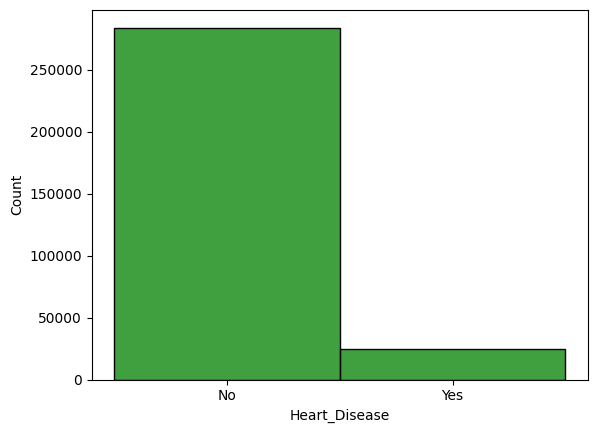

In [ ]:
sns.histplot(df['Heart_Disease'], color='green');

Como el target, que es predecir el Heart_Disease, está muy desequilibrado, hay suficientes datos y no queremos que nuesto modelo esté sesgado hacia decir no puesto que la mayoria de los datos dicen que no, vamos a reducir los que tienen este campo negativo.

In [ ]:
df = pd.concat([df[df['Heart_Disease'] == 'No'].sample(50000), df[df['Heart_Disease'] == 'Yes']])

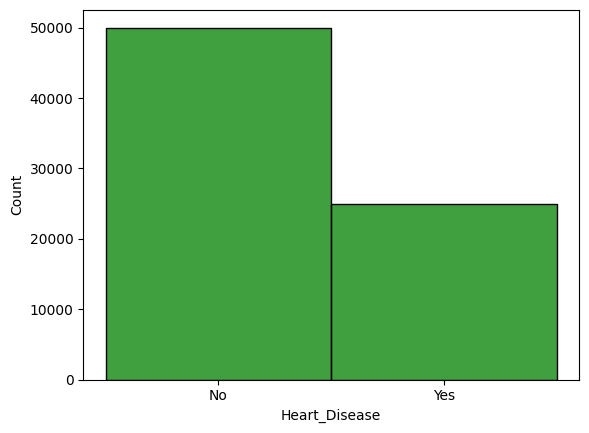

In [ ]:
sns.histplot(df['Heart_Disease'], color='green');

Vemos que el target ya está un poco más nivelado.

# Visualización de los datos

Vamos a ir viendo los diferentes atributos y la frecuencia relativa de la enfermedad en función de estos, para tener una idea de como afectan en el target.

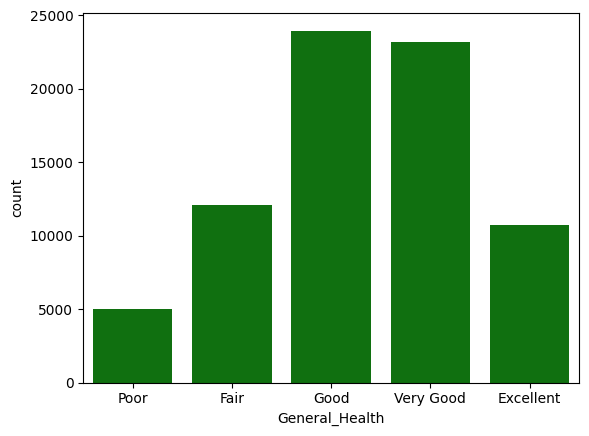

In [ ]:
sns.countplot(data = df, x = 'General_Health', color='green', order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']);

Vemos que la mayoría de los datos se centran en el Good y Very Good.

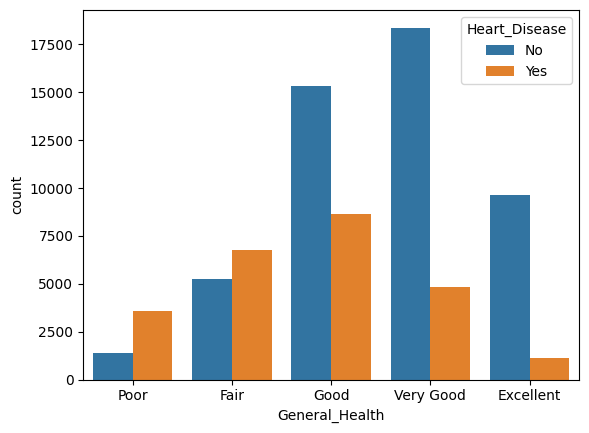

In [ ]:
sns.countplot(data = df, x = 'General_Health', order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'], hue = 'Heart_Disease');

Podemos observar que cuanto peor es el estado de la salud general mayor porcentaje tiene la persona a desarrollar la enfermedad del corazón.

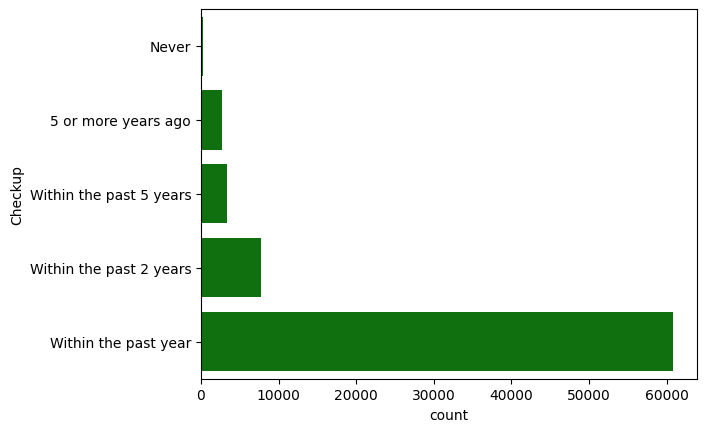

In [ ]:
sns.countplot(data = df, y = 'Checkup', color='green', order = ['Never', '5 or more years ago', 'Within the past 5 years', 'Within the past 2 years', 'Within the past year']);

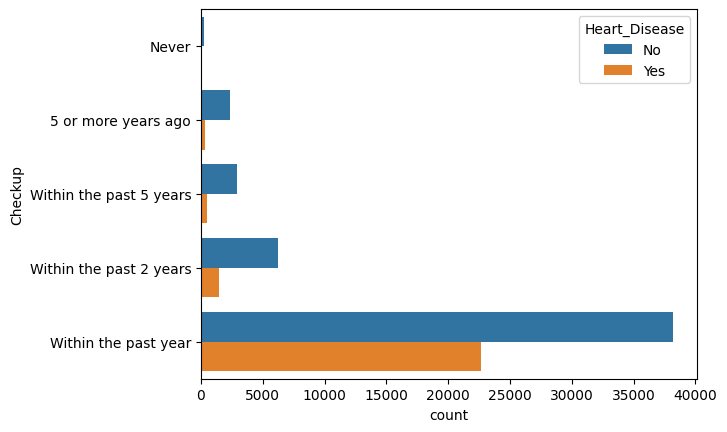

In [ ]:
sns.countplot(data = df, y = 'Checkup', order = ['Never', '5 or more years ago', 'Within the past 5 years', 'Within the past 2 years', 'Within the past year'], hue = 'Heart_Disease');

Cuanto más hace que la persona no se ha hecho una evaluación menos tendencia tiene a tener el target, pero probablemente no sea esto lo que lo ocasione sino que si la persona está en mejor estado es más probable que no tenga que hacerse checkups mientras que si está peor acudirá con mayor regularidad al médico. Podemos mirar como se relaciona el checkup con la general health.

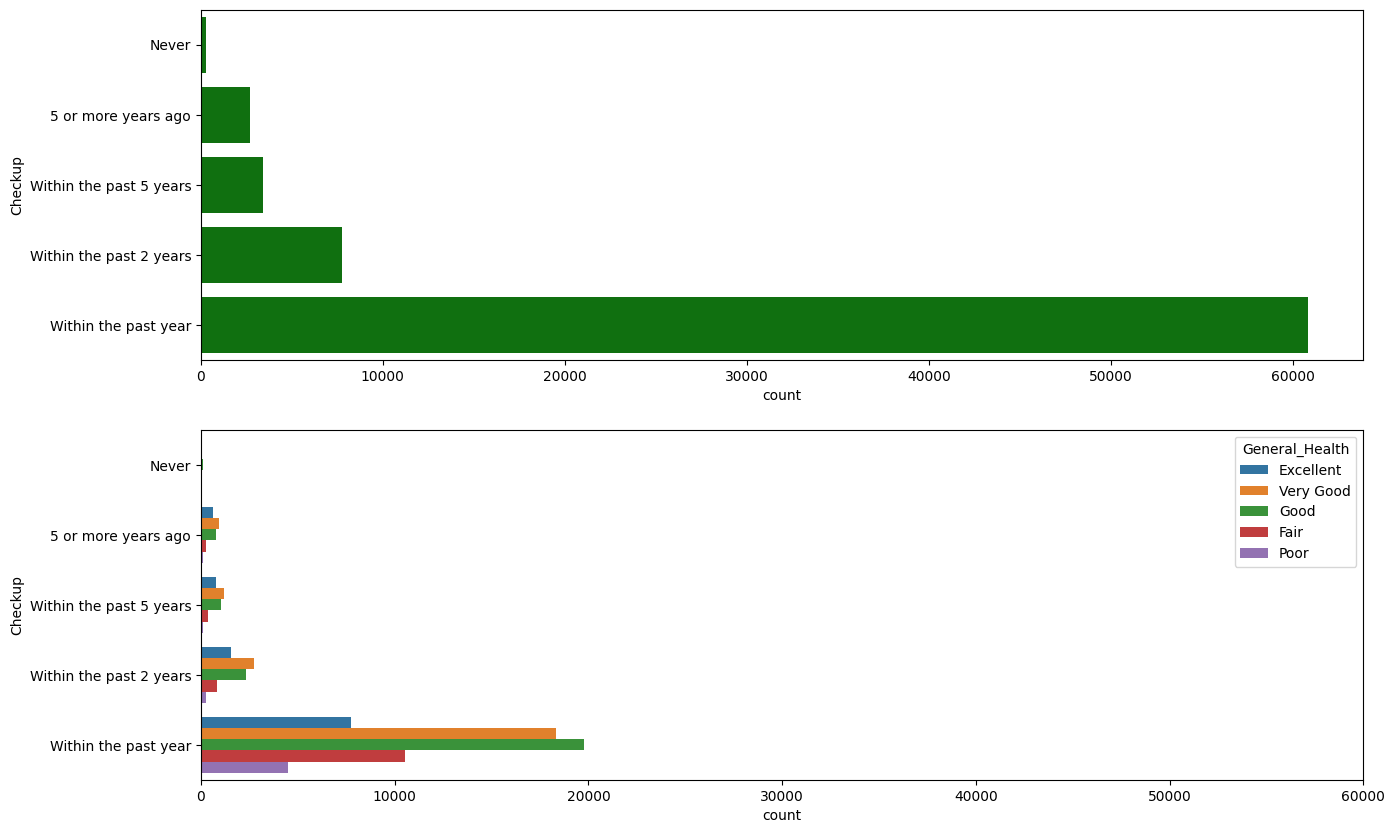

In [ ]:
pl, ejes = plt.subplots(2, 1, figsize = (15,10))
pl1 = sns.countplot(data = df, y = 'Checkup', order = ['Never', '5 or more years ago', 'Within the past 5 years', 'Within the past 2 years', 'Within the past year'], hue = 'General_Health', hue_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], ax = ejes[1]);
pl1.set_xlim(right = 60000)
sns.countplot(data = df, y = 'Checkup', color='green', order = ['Never', '5 or more years ago', 'Within the past 5 years', 'Within the past 2 years', 'Within the past year'], ax = ejes[0]);

Hay un descenso en el número de Good, Very Good y Excellent en los que se han hecho una revisión el último año respecto al resto, por lo que hay más Fair y Poor y respalda la deducción anterior.

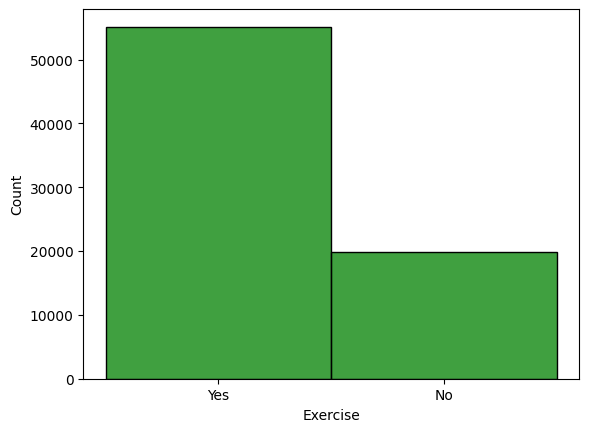

In [ ]:
sns.histplot(df['Exercise'], color='green');

Hay una tendencia marcada a que los pacientes hagan ejercicio, probablemente como forma de ayuda al tratamiento.

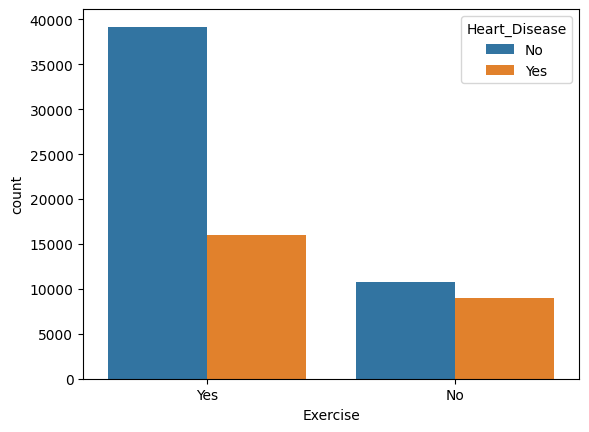

In [ ]:
sns.countplot(data = df, x = 'Exercise', hue = 'Heart_Disease');

Vemos que hacer ejercicio disminuye notablemente la probabilidad de desarrollar la enfermedad.

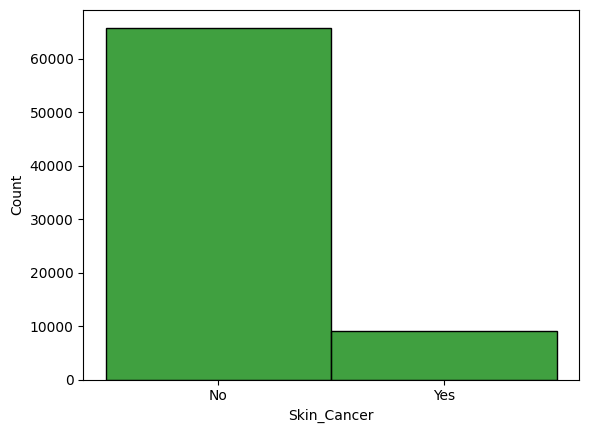

In [ ]:
sns.histplot(df['Skin_Cancer'], color='green');

La muestra tiene un claro desnivel en este campo.

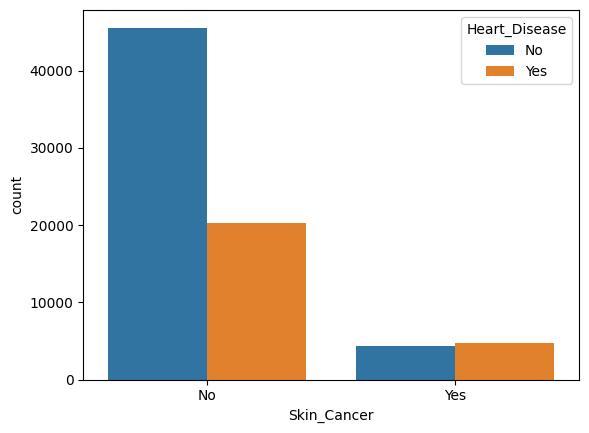

In [ ]:
sns.countplot(data = df, x = 'Skin_Cancer', hue = 'Heart_Disease');

Al igual que con el ejercicio, cuando la persona no sufre cáncer de piel tiene una menor tendencia de sufrir el heart disease.

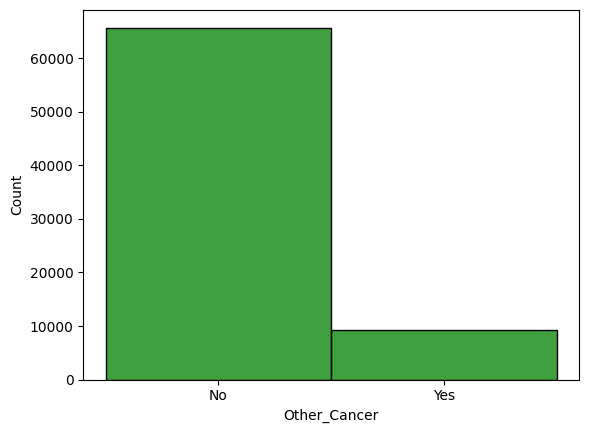

In [ ]:
sns.histplot(df['Other_Cancer'], color='green');

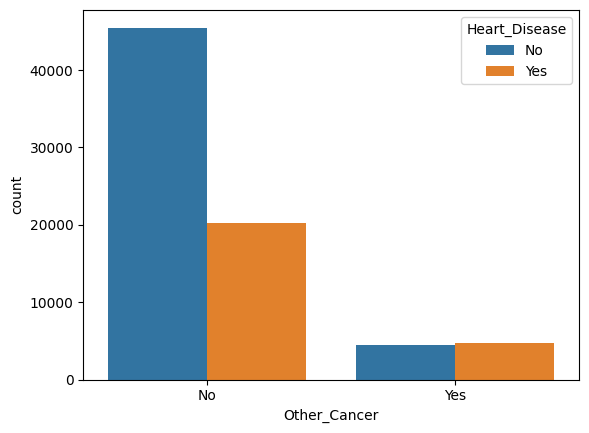

In [ ]:
sns.countplot(data = df, x = 'Other_Cancer', hue = 'Heart_Disease');

Las distribuciones son similares a las del ejercicio y las del cáncer de piel.

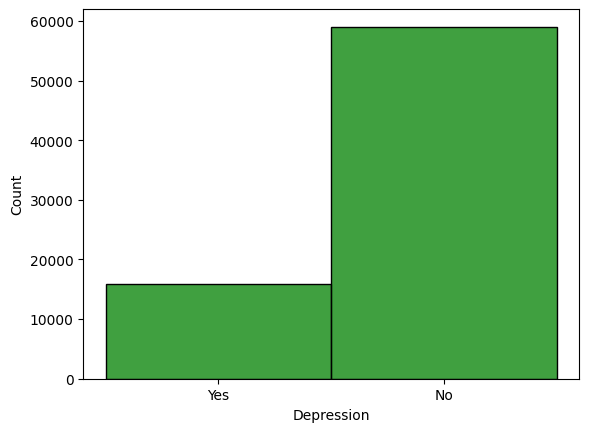

In [ ]:
sns.histplot(df['Depression'], color='green');

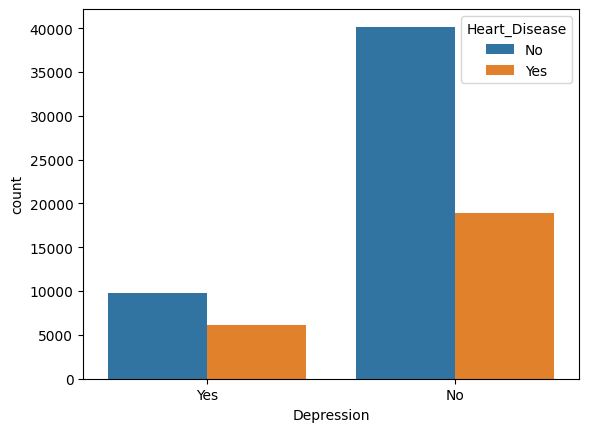

In [ ]:
sns.countplot(data = df, x = 'Depression', hue = 'Heart_Disease');

En este caso ocurre lo mismo pero más sutilmente en contraste con las anteriores.

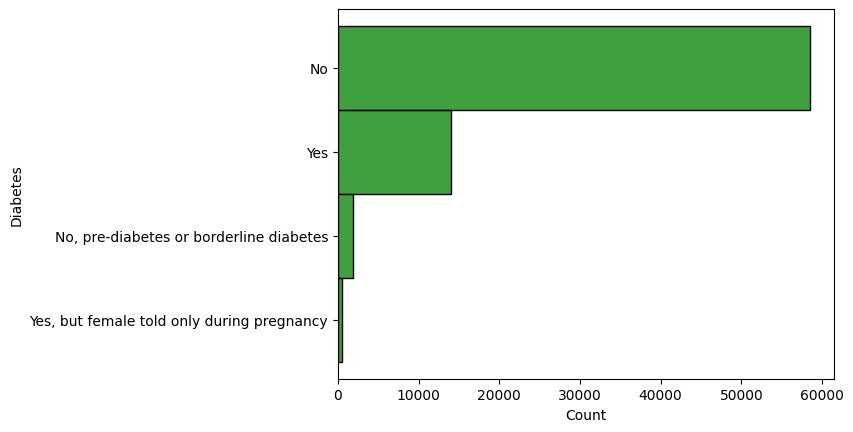

In [ ]:
sns.histplot(data = df,  y = 'Diabetes', color = 'green');

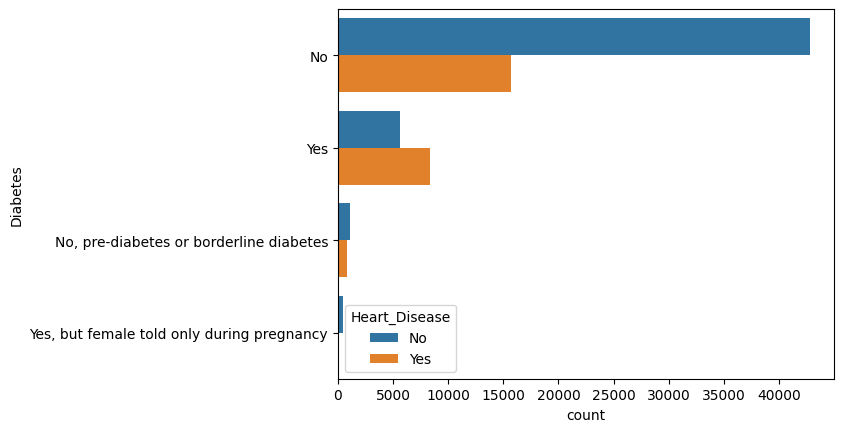

In [ ]:
sns.countplot(data = df,  y = 'Diabetes', hue = 'Heart_Disease');

Observamos que tener diabetes parece fomentar la enfermedad. Ademas vemos que el hecho de que a una mujer se le diagnosticase diabetes solamente durante el embarazo está "más cerca" del no, en cambio, que una persona tenga pre-diabetes o borderline diabetes se asimila más a tenerla (lo usaremos al momento de codificar esta variable).

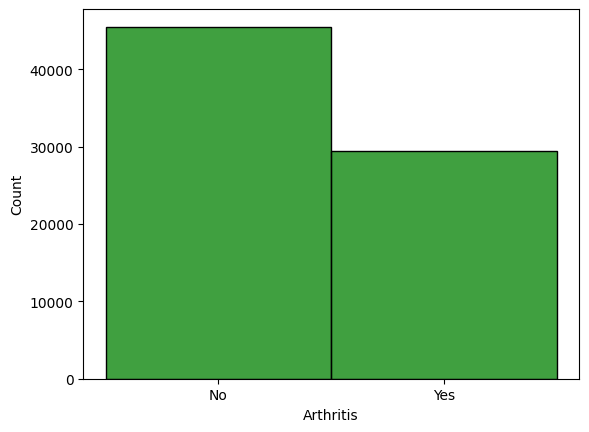

In [ ]:
sns.histplot(df['Arthritis'], color='green');

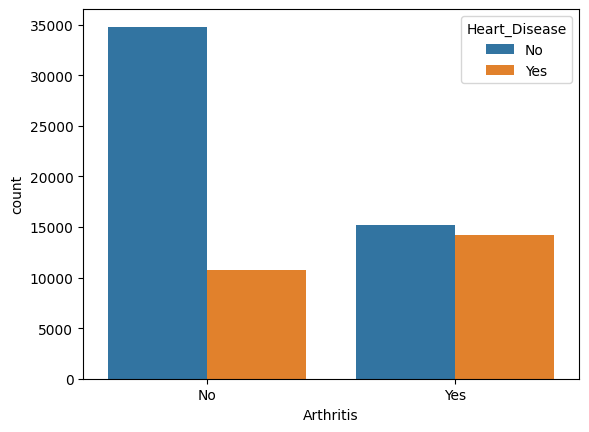

In [ ]:
sns.countplot(data = df, x = 'Arthritis', hue = 'Heart_Disease');

Que no tenga artritis parece favorecer a que la persona no tenga el target, pero tal vez simplemente es porque la artritis tiende a aparecer en personas de edad más avanzada (como se ve en el siguiente gráfico) y que realmente sea la edad lo que genera esa diferencia.

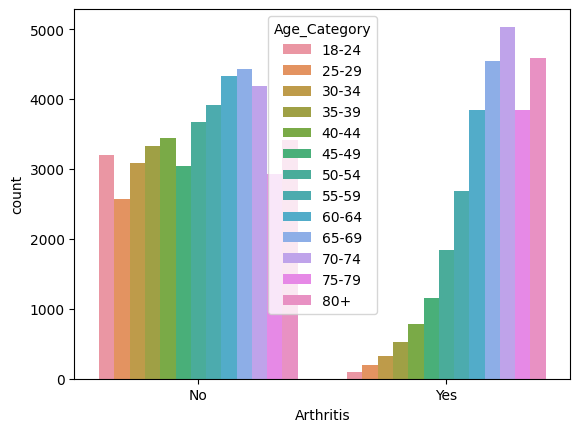

In [ ]:
sns.countplot(data = df, x = 'Arthritis', hue = 'Age_Category', hue_order = np.sort(df['Age_Category'].unique()));

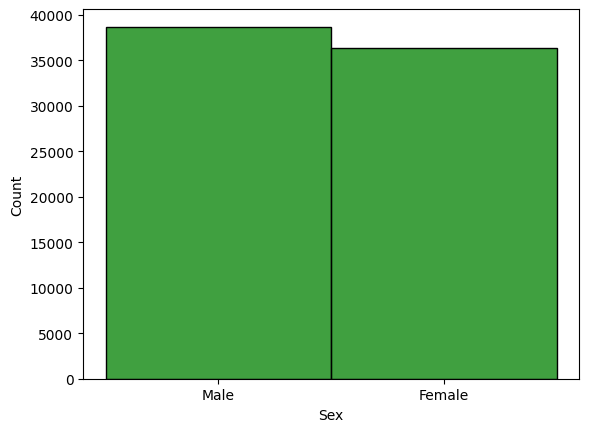

In [ ]:
sns.histplot(df['Sex'], color='green');

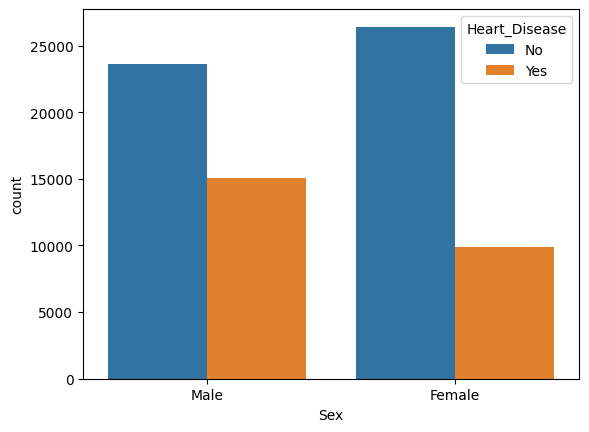

In [ ]:
sns.countplot(data = df, x = 'Sex', hue = 'Heart_Disease');

Hay una tendencia destacable a que lo desarrollen más los hombres que las mujeres.

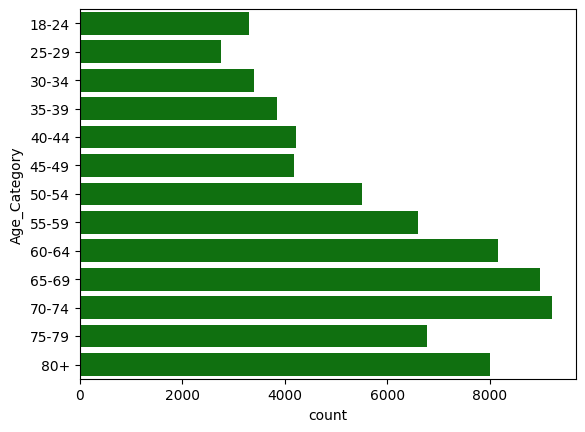

In [ ]:
sns.countplot(data = df, y = 'Age_Category', color='green', order = np.sort(df['Age_Category'].unique()));

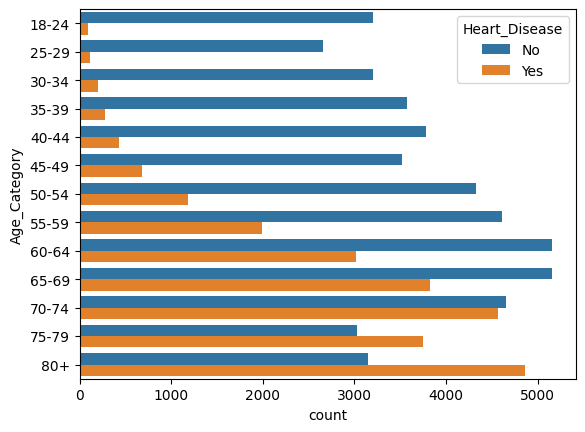

In [ ]:
sns.countplot(data = df, y = 'Age_Category', hue ='Heart_Disease', order = np.sort(df['Age_Category'].unique()));

Cuanto mayor es la edad del sujeto, este sufre la enfermedad con mayor frecuencia.

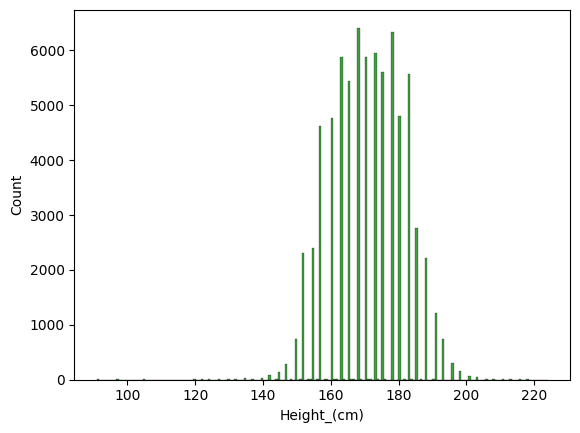

In [ ]:
sns.histplot(df['Height_(cm)'], color='green');

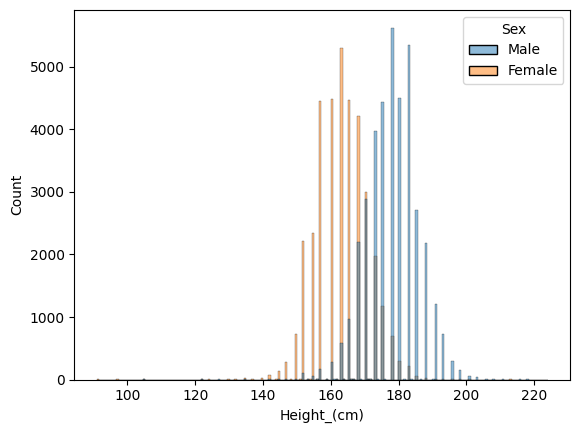

In [ ]:
sns.histplot(data = df, x = 'Height_(cm)', hue = 'Sex');

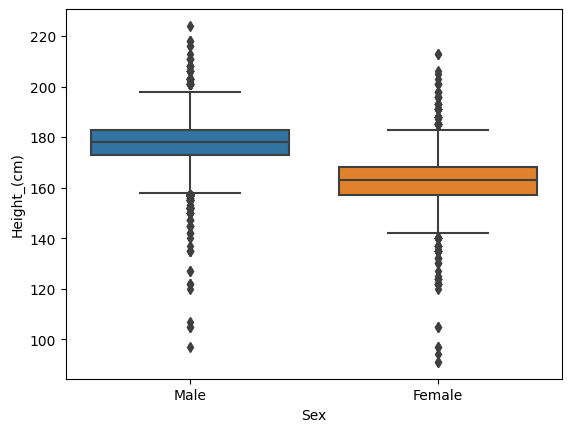

In [ ]:
sns.boxplot(x = df['Sex'], y = df['Height_(cm)']);

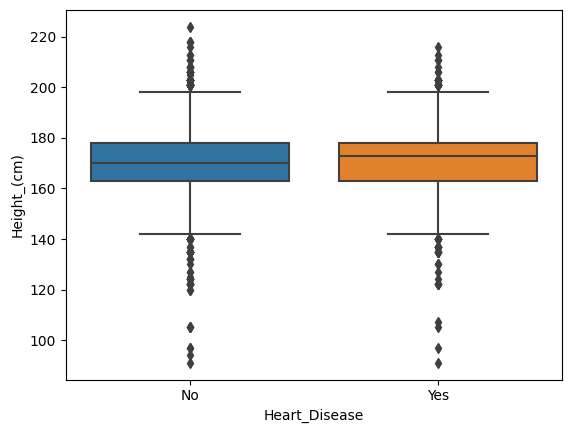

In [ ]:
sns.boxplot(data = df, x = 'Heart_Disease', y = 'Height_(cm)');

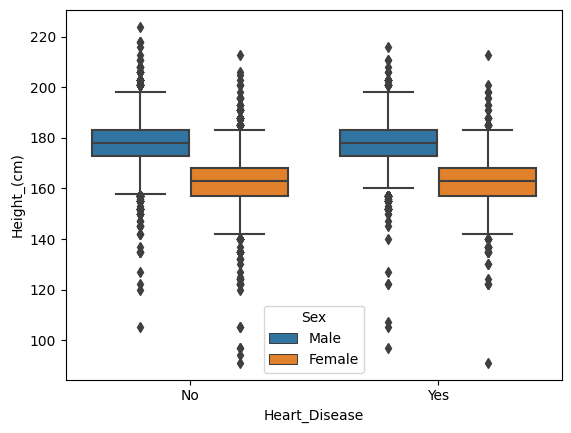

In [ ]:
sns.boxplot(data = df, x = 'Heart_Disease', y = 'Height_(cm)', hue = 'Sex');

No parece haber demasiada diferencia en que se tenga o no la enfermedad en función de la altura de la persona. Lo mismo pasa con el peso y el ICM (BMI en inglés).

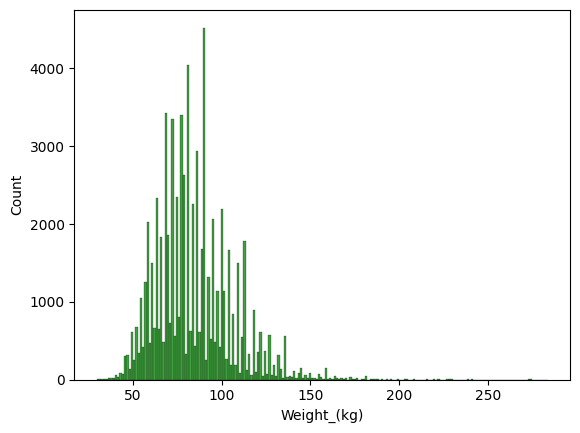

In [ ]:
sns.histplot(df['Weight_(kg)'], color='green');

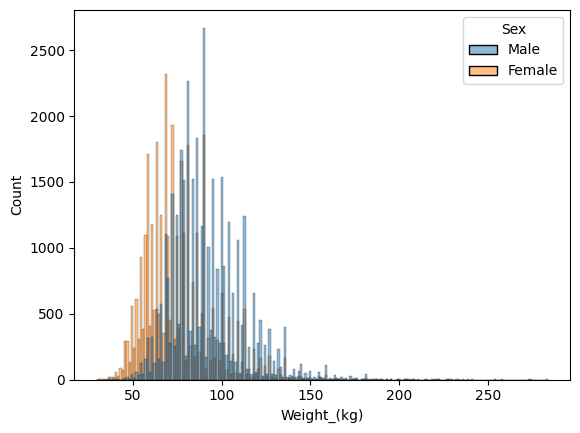

In [ ]:
sns.histplot(data = df, x = 'Weight_(kg)', hue = 'Sex');

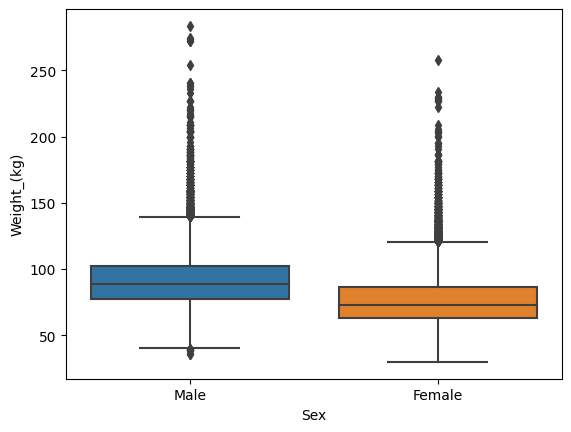

In [ ]:
sns.boxplot(y = df['Weight_(kg)'], x = df['Sex']);

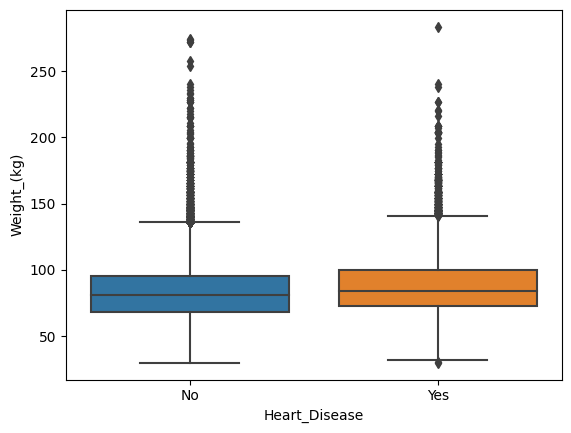

In [ ]:
sns.boxplot(y = df['Weight_(kg)'], x = df['Heart_Disease']);

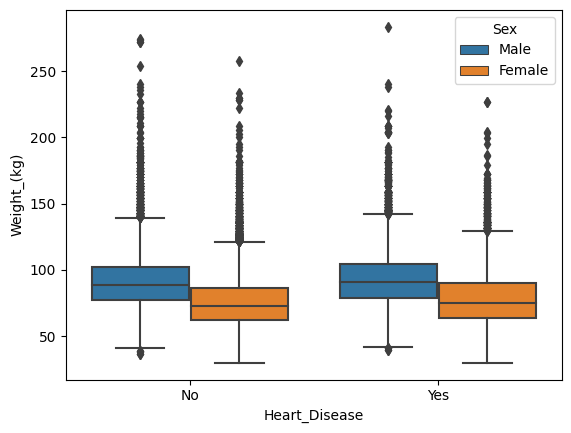

In [ ]:
sns.boxplot(data = df, y = 'Weight_(kg)', x = 'Heart_Disease', hue = 'Sex');

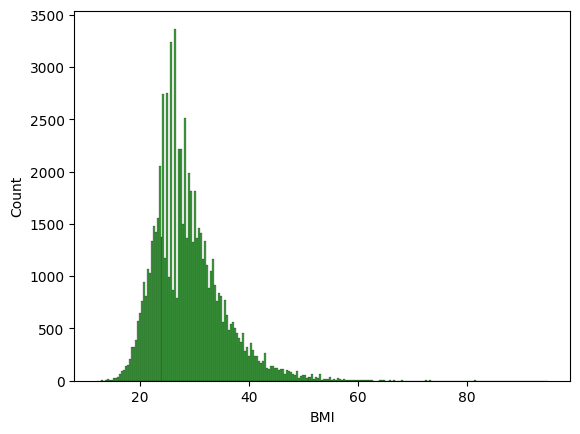

In [ ]:
sns.histplot(df['BMI'], color='green');

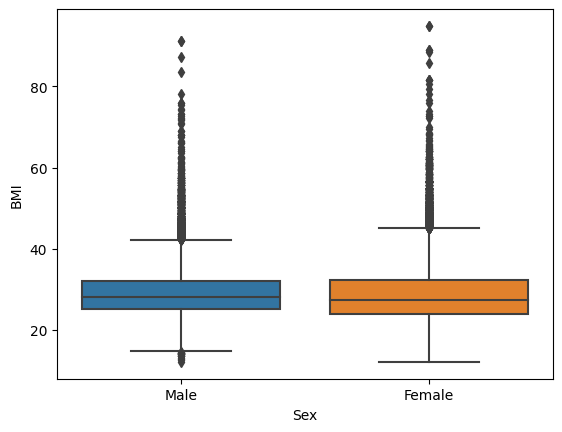

In [ ]:
sns.boxplot(y = df['BMI'], x = df['Sex']);

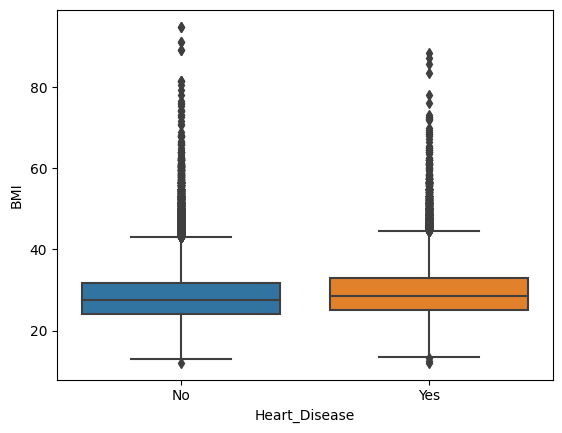

In [ ]:
sns.boxplot(y = df['BMI'], x = df['Heart_Disease']);

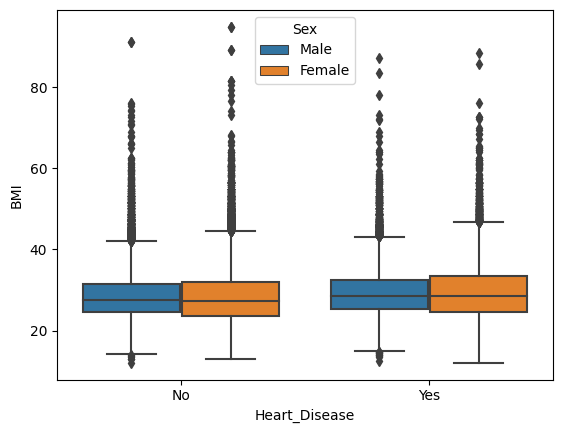

In [ ]:
sns.boxplot(data = df, y = 'BMI', x = 'Heart_Disease', hue = 'Sex');

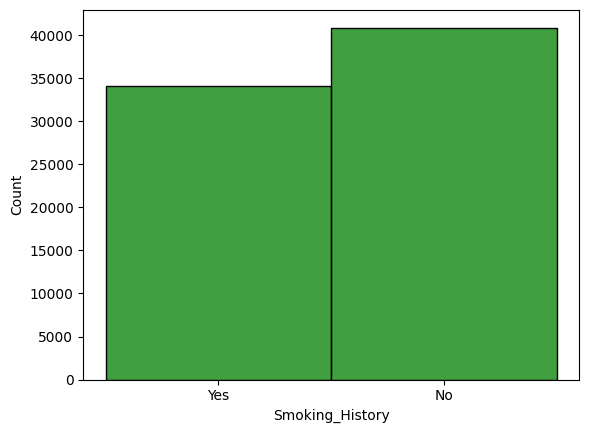

In [ ]:
sns.histplot(df['Smoking_History'], color = 'green');

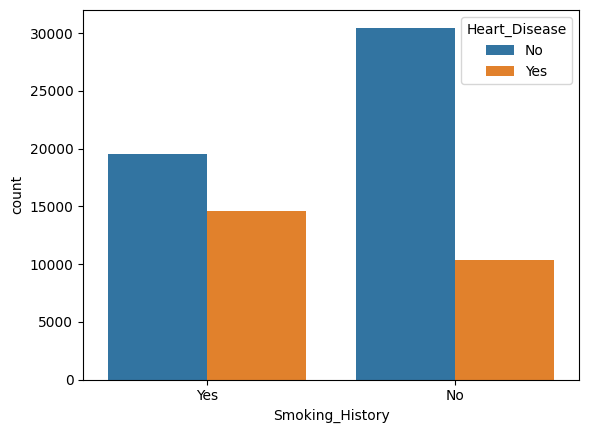

In [ ]:
sns.countplot(data = df, x = 'Smoking_History', hue = 'Heart_Disease');

Fumar hace que el sujeto tenga una mayor probabilidad de tener la afección del corazón.

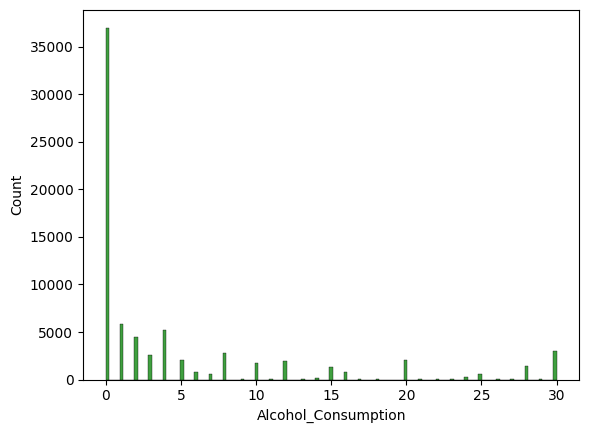

In [ ]:
sns.histplot(df['Alcohol_Consumption'], color = 'green');

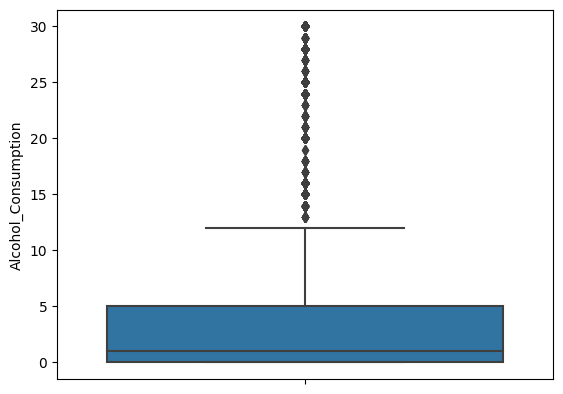

In [ ]:
sns.boxplot(y = df['Alcohol_Consumption']);

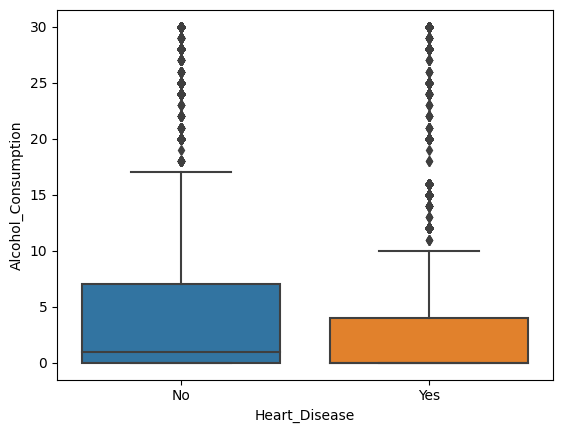

In [ ]:
sns.boxplot(y = df['Alcohol_Consumption'], x = df['Heart_Disease']);

Vemos que cuando la mayoría de las personas que no tienen la enfermedad tienden a beber más,  pero probablemente sea que como no la tienen se permiten beber más mientras que las personas que si la tienen van con más cuidado, en vez de que un mayor consumo de alcohol provoque que menos personas tengan la enfermedad.

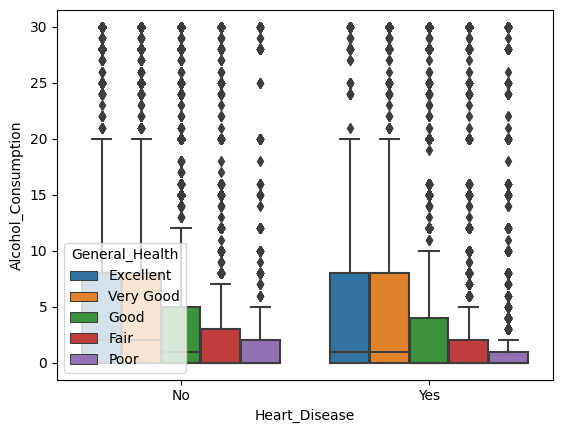

In [ ]:
sns.boxplot(data = df, y = 'Alcohol_Consumption', x = 'Heart_Disease', hue = 'General_Health', hue_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']);

No podemos llegar a afirmar firmemente la hipótesis anterior.

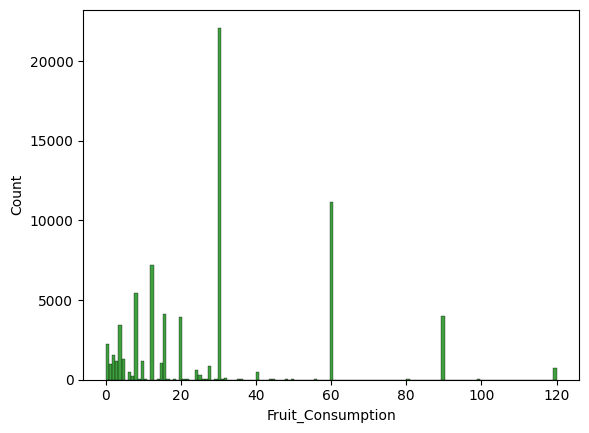

In [ ]:
sns.histplot(df['Fruit_Consumption'], color = 'green');

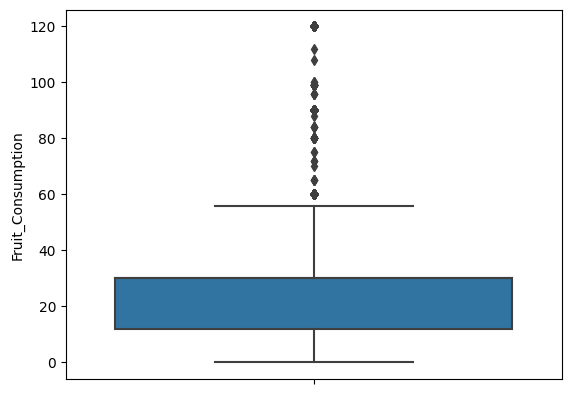

In [ ]:
sns.boxplot(y = df['Fruit_Consumption']);

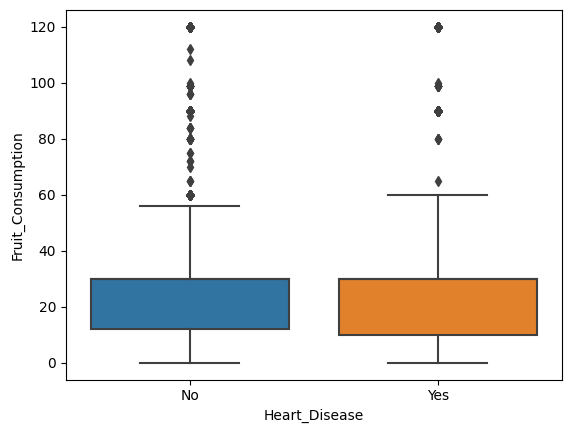

In [ ]:
sns.boxplot(y = df['Fruit_Consumption'], x = df['Heart_Disease']);

Ambas cajas son bastante similares exceptuando los outliers por lo que probablemente esta característica no afecte demasiado en la aparición de la enfermedad. Lo mismo pasa con el resto de campos alimenticeos.

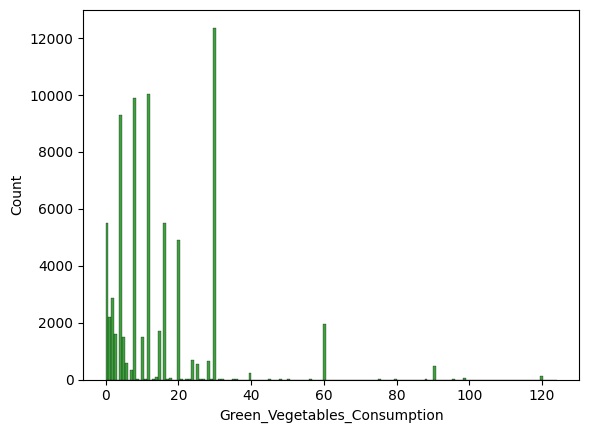

In [ ]:
sns.histplot(df['Green_Vegetables_Consumption'], color = 'green');

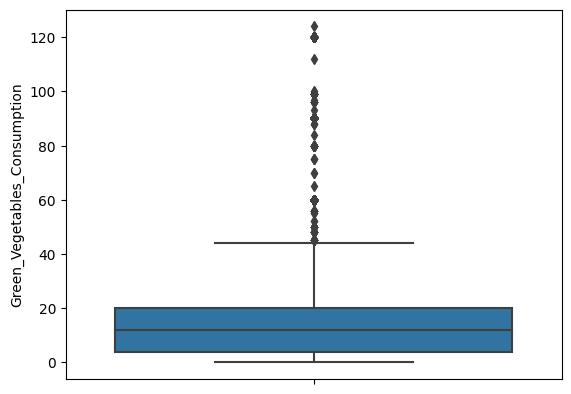

In [ ]:
sns.boxplot(y = df['Green_Vegetables_Consumption']);

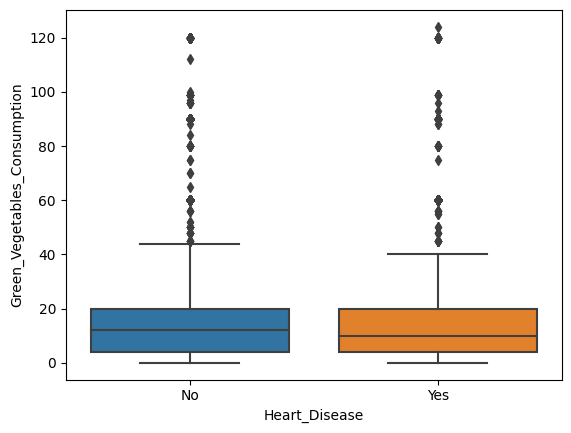

In [ ]:
sns.boxplot(y = df['Green_Vegetables_Consumption'], x = df['Heart_Disease']);

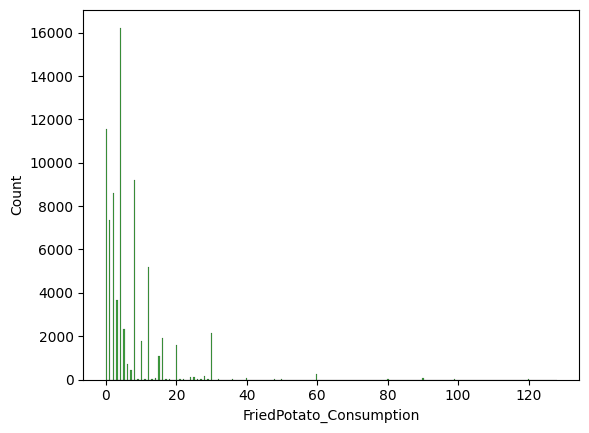

In [ ]:
sns.histplot(df['FriedPotato_Consumption'], color = 'green');

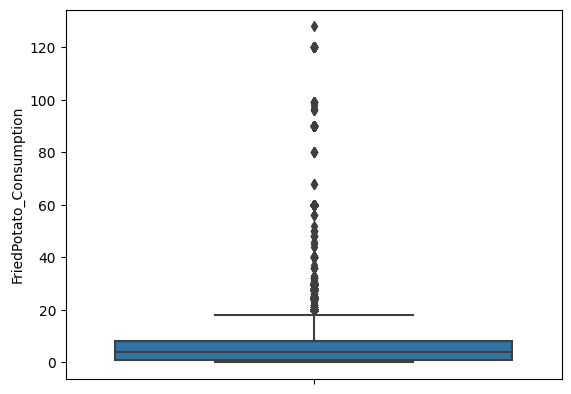

In [ ]:
sns.boxplot(y = df['FriedPotato_Consumption']);

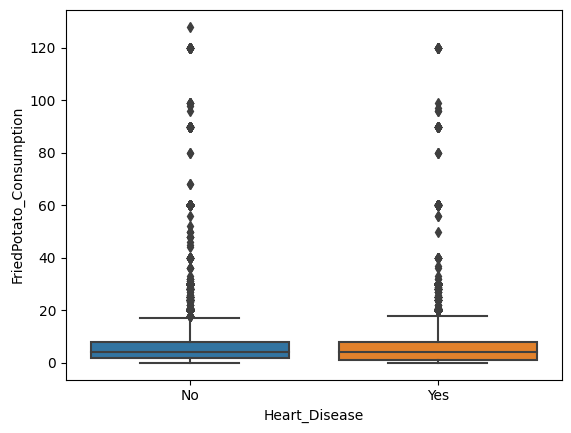

In [ ]:
sns.boxplot(y = df['FriedPotato_Consumption'], x = df['Heart_Disease']);



---
Conclusión del análisis inicial:

De la visualización de los datos podemos extraer que los datos que estan más relacionados con el campo del target son:
- General_Health
- Checkup (probablemente porque sigue una correlación con General Health)
- Exercise
- Skin Cancer
- Other Cancer
- Depression
- Diabetes
- Arthritis (probablemente porque sigue una correlación con Age Category)
- Age Category
- Sex
- Smoking History

Puesto que los campos restantes no parecen aportar mucha información respecto al target probaremos modelos con y sin ellos para ver cómo afectan en el resultado del modelo.

# Preprocesamiento

## Missing values

In [ ]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

Como no hay missing values no necesitamos hacer nada al respecto

## Codificación de variables no numéricas

In [ ]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

### Variables ordinales

- `General_Health` (Poor, Fair, Good, Very Good, Excellent)
- `Checkup` (Never, 5 or more years ago, Within the past 5 years, Within the past 2 years, Within the past year)
- `Diabetes` (No; Yes, but female told only during pregnancy; No, pre-diabetes or borderline diabetes; Yes)
- `Age_Category` (18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 75-79, 80+)

In [ ]:
df['General_Health'] = df['General_Health'].map({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4})
df['Checkup'] = df['Checkup'].map({'Never': 0, '5 or more years ago': 1, 'Within the past 5 years': 2, 'Within the past 2 years': 3, 'Within the past year': 4})
df['Diabetes'] = df['Diabetes'].map({'No': 0, 'Yes, but female told only during pregnancy': 1, 'No, pre-diabetes or borderline diabetes': 2, 'Yes': 3})
df['Age_Category'] = df['Age_Category'].map({'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12})
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
229444,4,4,Yes,No,No,No,Yes,0,No,Male,3,178.0,74.84,23.67,Yes,12.0,30.0,15.0,16.0
280189,3,4,Yes,No,No,No,No,0,No,Female,8,160.0,86.18,33.66,No,0.0,60.0,30.0,8.0
208364,3,4,No,No,No,No,No,3,Yes,Female,8,160.0,90.72,35.43,Yes,0.0,8.0,30.0,1.0
49558,3,2,Yes,No,No,No,No,0,No,Male,4,168.0,95.25,33.89,No,6.0,4.0,4.0,8.0
307546,1,4,Yes,No,No,No,No,0,No,Male,10,180.0,72.57,22.32,Yes,2.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308779,3,4,No,Yes,No,No,No,3,No,Male,8,168.0,102.06,36.32,No,20.0,8.0,8.0,0.0
308800,2,4,Yes,Yes,No,No,No,0,Yes,Male,8,178.0,69.85,22.10,Yes,0.0,30.0,3.0,4.0
308803,1,4,Yes,Yes,No,No,No,3,No,Male,7,191.0,127.01,35.00,Yes,8.0,8.0,16.0,8.0
308809,2,4,No,Yes,No,Yes,No,3,No,Male,11,180.0,81.65,25.10,No,0.0,60.0,0.0,0.0


### Variables nominales

- `Exercise` booleano
- `Heart_Disease` booleano
- `Skin_Cancer` booleano
- `Other_Cancer` booleano
- `Depression` booleano
- `Arthritis` booleano
- `Sex` binario
- `Smoking_History` booleano

Como ya tienen las categorías bien puestas no necesitamos cambiarlas

Pasamos todos las variables de tipo object a tipo category

In [ ]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
df.dtypes

General_Health                     int64
Checkup                            int64
Exercise                        category
Heart_Disease                   category
Skin_Cancer                     category
Other_Cancer                    category
Depression                      category
Diabetes                           int64
Arthritis                       category
Sex                             category
Age_Category                       int64
Height_(cm)                      float64
Weight_(kg)                      float64
BMI                              float64
Smoking_History                 category
Alcohol_Consumption              float64
Fruit_Consumption                float64
Green_Vegetables_Consumption     float64
FriedPotato_Consumption          float64
dtype: object

Generamos los dummies

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
229444,4,4,0,3,178.0,74.84,23.67,12.0,30.0,15.0,16.0,1,0,0,0,1,0,1,1
280189,3,4,0,8,160.0,86.18,33.66,0.0,60.0,30.0,8.0,1,0,0,0,0,0,0,0
208364,3,4,3,8,160.0,90.72,35.43,0.0,8.0,30.0,1.0,0,0,0,0,0,1,0,1
49558,3,2,0,4,168.0,95.25,33.89,6.0,4.0,4.0,8.0,1,0,0,0,0,0,1,0
307546,1,4,0,10,180.0,72.57,22.32,2.0,0.0,0.0,8.0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308779,3,4,3,8,168.0,102.06,36.32,20.0,8.0,8.0,0.0,0,1,0,0,0,0,1,0
308800,2,4,0,8,178.0,69.85,22.10,0.0,30.0,3.0,4.0,1,1,0,0,0,1,1,1
308803,1,4,3,7,191.0,127.01,35.00,8.0,8.0,16.0,8.0,1,1,0,0,0,0,1,1
308809,2,4,3,11,180.0,81.65,25.10,0.0,60.0,0.0,0.0,0,1,0,1,0,0,1,0


In [ ]:
df.describe()

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
count,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000,74971.000000
mean,2.302637,3.682491,0.617892,7.296208,170.791639,84.463657,28.861514,4.820077,29.393592,14.836390,6.224914,0.735778,0.333075,0.121354,0.123088,0.212589,0.392992,0.515653,0.454856
std,1.103951,0.755188,1.186462,3.459052,10.666717,21.524909,6.548772,8.205648,24.840620,14.770833,8.539176,0.440921,0.471316,0.326540,0.328540,0.409142,0.488418,0.499758,0.497961
min,0.000000,0.000000,0.000000,0.000000,91.000000,29.940000,12.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,5.000000,163.000000,68.490000,24.390000,0.000000,12.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,4.000000,0.000000,8.000000,170.000000,81.650000,27.800000,1.000000,30.000000,12.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,4.000000,0.000000,10.000000,178.000000,95.250000,32.100000,5.000000,30.000000,20.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,4.000000,4.000000,3.000000,12.000000,224.000000,283.500000,94.940000,30.000000,120.000000,124.000000,128.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Outliers

El tratamiento de los outliers solo afectará en los modelos hechos con todos los campos puesto que estos ocurren en los que no parecen tener una alta relación con el target. Creamos una copia del dataframe para que la eliminación de algunos outliers no quite datos en los modelos que no tengan todas las columnas.

In [ ]:
df_ori = df

Como son temas médicos es normal que pueda haber valores anómalos sin ser estos erróneos, e interesa que estos también queden plasmados en el modelo, por lo tanto trataremos solamente los más extremados (porque tampoco queremos que afecten negativamente a los modelos), esto lo aplicaremos a la altura, el peso y el ICM (BMI en inglés).

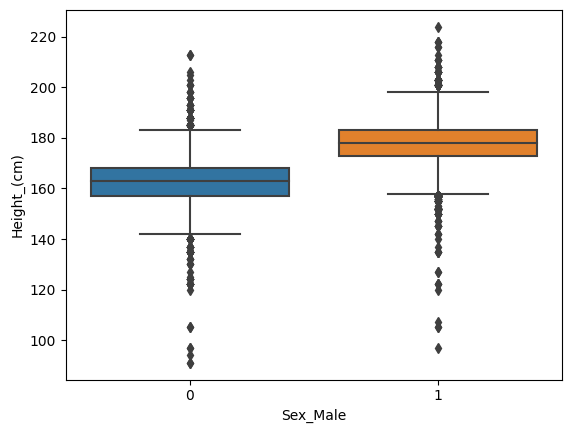

In [ ]:
sns.boxplot(x = df['Sex_Male'], y = df['Height_(cm)']);

Quitaremos los outliers situados después de los saltos en la distribución.

In [ ]:
df[(df['Height_(cm)'] >= 220) & (df['Sex_Male'] == 1)]

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
248342,3,4,0,11,224.0,112.49,22.52,28.0,60.0,4.0,12.0,1,0,0,0,0,0,1,0


In [ ]:
df[(df['Height_(cm)'] <= 120) & (df['Sex_Male'] == 1)]

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
102203,3,4,0,9,105.0,73.00,66.21,8.0,4.0,0.0,0.0,0,0,0,0,0,0,1,1
172524,0,0,0,3,120.0,86.18,59.85,0.0,60.0,4.0,1.0,1,0,0,0,0,0,1,0
195357,0,4,2,6,97.0,54.43,58.43,0.0,30.0,30.0,12.0,0,1,0,0,0,1,1,1
258497,3,4,3,12,107.0,78.47,68.95,0.0,0.0,8.0,30.0,0,1,0,0,1,0,1,1
289100,1,4,3,8,105.0,92.00,83.45,0.0,16.0,8.0,3.0,1,1,0,1,0,0,1,1


In [ ]:
df = df.drop(df[((df['Height_(cm)'] >= 220) | (df['Height_(cm)'] <= 120)) & (df['Sex_Male'] == 1)].index)

In [ ]:
df[(df['Height_(cm)'] >= 210) & (df['Sex_Male'] == 0)]

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
18999,2,4,0,12,213.0,79.83,17.54,0.0,30.0,0.0,0.0,1,0,0,0,0,0,0,0
75571,2,4,0,12,213.0,96.62,21.22,0.0,4.0,8.0,0.0,1,1,0,0,0,1,0,1


In [ ]:
df[(df['Height_(cm)'] < 120) & (df['Sex_Male'] == 0)]

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
253618,4,4,0,12,91.0,79.38,94.94,4.0,60.0,12.0,4.0,0,0,0,0,0,1,0,0
195510,0,2,0,0,97.0,88.45,94.94,0.0,60.0,30.0,8.0,0,0,0,0,1,1,0,0
19080,2,4,0,12,97.0,51.71,55.51,0.0,30.0,0.0,0.0,1,0,0,0,0,1,0,0
29699,0,4,3,8,105.0,81.65,74.06,0.0,30.0,30.0,0.0,0,0,0,0,0,1,0,0
107394,2,4,0,4,105.0,68.95,62.54,0.0,60.0,30.0,4.0,1,0,0,0,0,0,0,0
41285,4,4,0,0,94.0,49.90,56.49,0.0,40.0,40.0,40.0,1,0,0,0,0,0,0,0
27158,1,4,0,6,91.0,31.75,37.97,0.0,60.0,8.0,4.0,0,1,0,0,0,1,0,1


In [ ]:
df = df.drop(df[((df['Height_(cm)'] >= 210) | (df['Height_(cm)'] < 120)) & (df['Sex_Male'] == 0)].index)

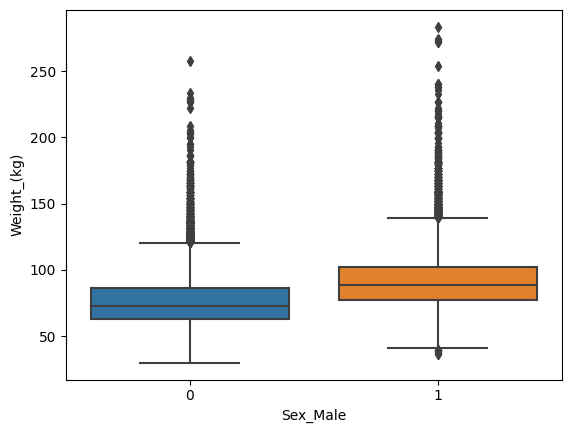

In [ ]:
sns.boxplot(y = df['Weight_(kg)'], x = df['Sex_Male']);

Mismo trato para los outilers del peso

In [ ]:
df[(df['Weight_(kg)'] >= 255) & (df['Sex_Male'] == 1)]

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
227580,4,4,0,4,196.0,274.42,71.74,2.0,20.0,20.0,0.0,1,0,0,0,0,0,1,0
304337,1,1,0,4,173.0,272.16,91.23,0.0,30.0,4.0,8.0,0,0,0,0,0,0,1,0
218058,0,4,3,7,173.0,272.16,91.23,0.0,4.0,4.0,2.0,0,0,0,0,1,1,1,1
124131,3,4,0,4,191.0,273.52,75.37,0.0,60.0,8.0,12.0,1,0,0,0,0,0,1,0
287501,0,4,3,5,191.0,283.50,78.12,0.0,2.0,4.0,10.0,1,1,0,0,1,1,1,1


In [ ]:
df = df.drop(df[(df['Weight_(kg)'] >= 255) & (df['Sex_Male'] == 1)].index)

In [ ]:
df[(df['Weight_(kg)'] >= 240) & (df['Sex_Male'] == 0)]

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
249454,0,4,3,5,178.0,257.64,81.5,0.0,10.0,0.0,1.0,0,0,0,0,1,1,0,1


In [ ]:
df = df.drop(df[(df['Weight_(kg)'] >= 240) & (df['Sex_Male'] == 0)].index)

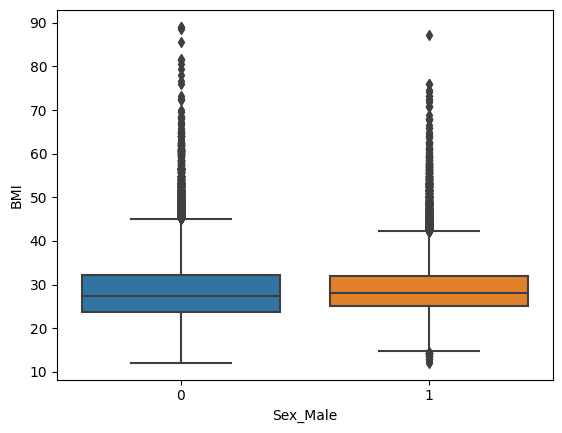

In [ ]:
sns.boxplot(y = df['BMI'], x = df['Sex_Male']);

In [ ]:
df[df['BMI'] >= 85]

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
21690,2,4,0,0,160.0,228.16,89.10,0.0,30.0,20.0,8.0,1,0,0,0,1,0,0,0
4099,1,4,3,9,160.0,228.16,89.10,0.0,12.0,16.0,1.0,0,0,0,1,1,0,0,1
76843,0,4,0,4,160.0,226.80,88.57,0.0,5.0,6.0,10.0,1,1,0,0,1,1,0,1
104919,1,4,3,12,147.0,185.97,85.69,0.0,12.0,12.0,4.0,0,1,0,0,1,1,0,1
159564,0,4,3,2,127.0,140.61,87.18,30.0,10.0,0.0,15.0,0,1,0,0,1,1,1,1


In [ ]:
df = df.drop(df[df['BMI'] >= 85].index);

Vamos a probar a ser más estrictos con los outliers del resto de columnas puesto que hay menos de estos que en los campos anteriores.

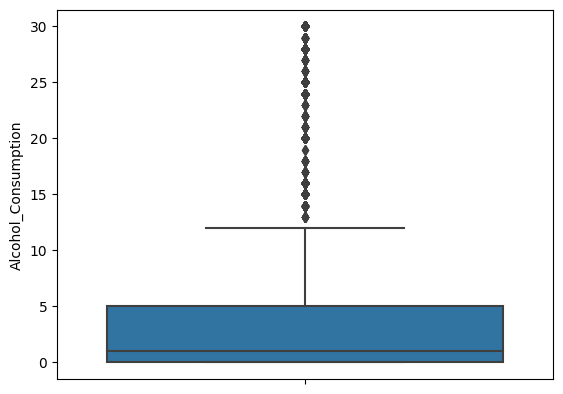

In [ ]:
sns.boxplot(y = df['Alcohol_Consumption']);

In [ ]:
df[df['Alcohol_Consumption'] >= 25]

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
192366,3,4,3,8,160.0,58.97,23.03,30.0,30.0,30.0,8.0,1,0,0,0,0,0,0,1
181642,1,4,0,10,173.0,92.99,31.17,28.0,30.0,12.0,30.0,1,0,0,1,0,1,1,1
119939,1,4,0,12,168.0,60.78,21.63,30.0,4.0,5.0,12.0,0,0,0,0,0,1,0,1
53041,3,4,0,9,170.0,72.57,25.06,30.0,20.0,0.0,8.0,1,0,1,0,0,0,1,0
296157,3,4,0,11,163.0,65.77,24.89,28.0,60.0,30.0,4.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306521,4,4,0,3,165.0,56.70,20.80,28.0,30.0,12.0,8.0,1,1,0,0,1,0,1,1
307516,0,3,0,9,163.0,69.85,26.43,30.0,30.0,8.0,4.0,1,1,0,0,1,1,1,1
307568,1,4,0,11,175.0,111.58,36.33,28.0,12.0,12.0,4.0,1,1,0,1,0,1,1,0
308264,2,4,0,7,170.0,85.28,29.44,30.0,0.0,3.0,4.0,0,1,0,0,1,0,0,1


In [ ]:
df = df.drop(df[df['Alcohol_Consumption'] >= 25].index)

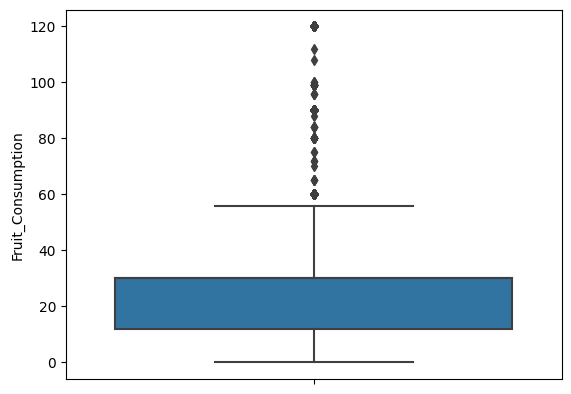

In [ ]:
sns.boxplot(y = df['Fruit_Consumption']);

In [ ]:
df[df['Fruit_Consumption'] >= 90]

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
9330,4,1,0,0,185.0,81.65,23.75,4.0,90.0,1.0,1.0,1,0,0,0,0,0,1,1
262641,1,4,0,5,170.0,133.81,46.20,0.0,120.0,12.0,2.0,1,0,1,0,0,0,0,0
256602,3,4,0,2,165.0,90.72,33.28,6.0,90.0,30.0,12.0,1,0,0,0,1,0,0,0
232624,3,4,0,0,180.0,72.57,22.32,1.0,90.0,12.0,3.0,1,0,0,0,1,0,1,0
214761,2,3,0,5,160.0,77.11,30.11,0.0,120.0,30.0,12.0,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304935,2,4,3,9,160.0,86.64,33.83,0.0,120.0,30.0,0.0,0,1,0,0,0,0,0,0
305351,1,4,2,8,160.0,61.69,24.09,0.0,90.0,60.0,4.0,0,1,0,0,1,1,0,1
305508,1,4,0,7,163.0,78.02,29.52,0.0,90.0,8.0,1.0,1,1,0,0,0,0,1,0
306279,2,4,3,10,175.0,102.06,33.23,0.0,90.0,8.0,8.0,1,1,0,1,0,0,1,1


In [ ]:
df = df.drop(df[df['Fruit_Consumption'] >= 90].index)

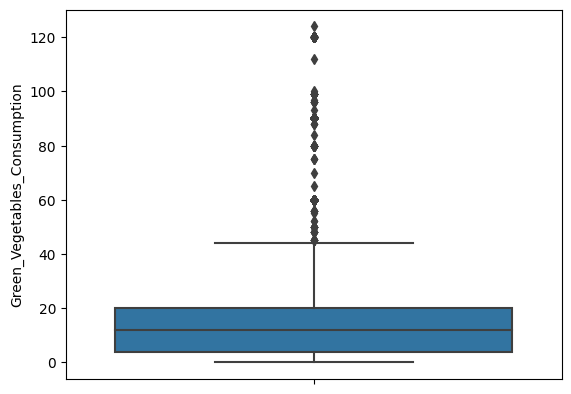

In [ ]:
sns.boxplot(y = df['Green_Vegetables_Consumption']);

In [ ]:
df[df['Green_Vegetables_Consumption'] >= 90]

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
271347,2,4,0,8,157.0,81.19,32.74,10.0,30.0,90.0,2.0,1,0,0,0,1,0,0,0
199157,3,4,0,0,168.0,51.71,18.40,0.0,60.0,90.0,1.0,1,0,0,0,0,0,1,0
300713,2,3,0,12,165.0,54.43,19.97,0.0,60.0,90.0,8.0,1,0,1,0,0,1,0,0
289689,4,3,0,4,155.0,59.87,24.94,0.0,60.0,90.0,12.0,1,0,0,0,0,0,1,0
115616,3,4,0,0,180.0,82.10,25.24,4.0,60.0,90.0,4.0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279176,1,4,0,10,168.0,53.52,19.05,0.0,16.0,120.0,0.0,0,1,0,1,1,1,0,1
290712,0,4,0,8,160.0,52.16,20.37,0.0,30.0,120.0,2.0,0,1,0,0,0,1,0,1
295213,2,1,0,9,178.0,74.84,23.67,0.0,1.0,90.0,0.0,1,1,0,0,0,0,1,0
295324,2,4,0,7,163.0,79.38,30.04,0.0,16.0,90.0,30.0,1,1,0,0,0,0,0,0


In [ ]:
df = df.drop(df[df['Green_Vegetables_Consumption'] >= 90].index)

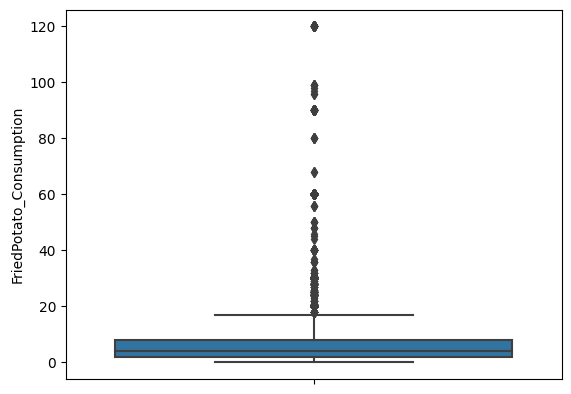

In [ ]:
sns.boxplot(y = df['FriedPotato_Consumption']);

In [ ]:
df[df['FriedPotato_Consumption'] >= 90]

,General_Health,Checkup,Diabetes,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
248704,3,2,0,5,173.0,99.79,33.45,0.0,30.0,20.0,90.0,1,0,0,0,0,0,1,0
254996,3,3,0,0,163.0,54.43,20.60,1.0,15.0,2.0,90.0,0,0,0,0,0,0,0,0
119958,2,4,3,11,183.0,86.18,25.77,1.0,8.0,8.0,90.0,1,0,0,0,0,0,1,1
121032,1,4,3,4,175.0,73.48,23.92,0.0,60.0,30.0,120.0,1,0,0,0,0,0,0,0
124099,2,3,0,4,175.0,61.69,20.08,0.0,0.0,0.0,90.0,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217420,3,4,3,6,163.0,90.72,34.33,0.0,0.0,4.0,90.0,1,1,0,0,1,0,1,0
255830,0,4,1,10,147.0,104.33,48.07,0.0,30.0,60.0,90.0,0,1,0,0,0,0,0,0
258371,3,4,0,0,180.0,79.38,24.41,8.0,60.0,8.0,120.0,1,1,0,0,1,0,1,0
262523,2,2,0,7,178.0,166.01,52.51,0.0,60.0,30.0,120.0,1,1,0,0,1,1,1,1


In [ ]:
df = df.drop(df[df['FriedPotato_Consumption'] >= 90].index)

# Modelización

## Preparación

Definimos la X y la y para ambos dataframes.

In [ ]:
# del dataframe original, serán los datos sin las columnas menos implicadas en el target
X0 = df_ori.drop(columns = ['Heart_Disease_Yes', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption'], axis = 1)
y0 = df_ori['Heart_Disease_Yes']

# del dataframe con tratamiento de outliers, serán los datos con todas las columnas
X1 = df.drop(['Heart_Disease_Yes'], axis = 1)
y1 = df['Heart_Disease_Yes']

Hacemos las separaciones de datos de entreno y datos de testeo para ambos conjuntos.

In [ ]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.25, random_state = 0)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)

Estandarizamos los datos para que todos tengan el mismo peso.

In [ ]:
scaler0 = StandardScaler()
X0_train_std = scaler0.fit_transform(X0_train)
X0_test_std = scaler0.fit(X0_train).transform(X0_test)

scaler1 = StandardScaler()
X1_train_std = scaler1.fit_transform(X1_train)
X1_test_std = scaler1.fit(X1_train).transform(X1_test)

Para poder comparar posteriormente los diferentes modelos nos guardaremos sus resultados.

In [ ]:
nombres = []
ac_scores = []

## Regresión Logística

El primer tipo de modelo que vamos a hacer va a ser el de regresión logística, primero con unos datos y después con los otros

### De X0 e y0

Creamos, entrenamos y ejecutamos el modelo, con cuyas predicciones mostramos la matriz de confusión. Utilizamos la cross validation para obtener las métricas de evaluación.

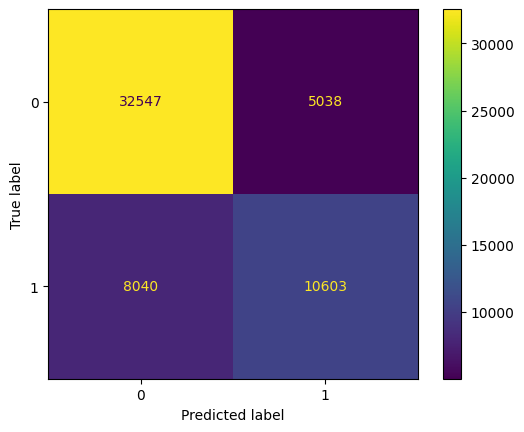

In [ ]:
logistic0 = LogisticRegression() # construir el modelo
logistic0.fit(X0_train_std, y0_train) # lo entrenamos con los datos de train
y0_pred = logistic0.predict(X0_train_std) # hacemos las predicciones con esos mismos datos

# pasamos el modelo por la cross validation con la métrica de accuracy
ac_score = cross_val_score(logistic0, X0_train_std, y0_train, cv = 10, scoring = 'accuracy')
y0_pred = cross_val_predict(logistic0, X0_train_std, y0_train, cv = 10)

# hacemos y mostramos la confusion matrix
confusio = confusion_matrix(y0_train.values, y0_pred)
ConfusionMatrixDisplay(confusio).plot();

Miramos el classification report de la matriz generada por el modelo.

In [ ]:
print(classification_report(y0_train.values, y0_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     37585
           1       0.68      0.57      0.62     18643

    accuracy                           0.77     56228
   macro avg       0.74      0.72      0.73     56228
weighted avg       0.76      0.77      0.76     56228



Miramos el scoring medio y lo guardamos para después compararlo con el resto.

In [ ]:
print(ac_score.mean())

0.767411258063502


In [ ]:
# guardamos los resultados
nombres.append('Regresión logística 0')
ac_scores.append(ac_score)

### De X1 e y1

Seguimos el mismo proceso con los otros datos.

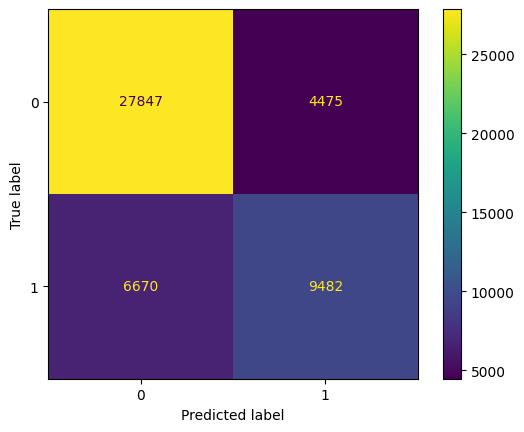

In [ ]:
logistic1 = LogisticRegression() # construir el modelo
logistic1.fit(X1_train_std, y1_train) # lo entrenamos con los datos de train
y1_pred = logistic1.predict(X1_train_std) # hacemos las predicciones con esos mismos datos

# pasamos el modelo por la cross validation con la métrica de accuracy
ac_score = cross_val_score(logistic1, X1_train_std, y1_train, cv = 10, scoring = 'accuracy')
y1_pred = cross_val_predict(logistic1, X1_train_std, y1_train, cv = 10)

# hacemos y mostramos la confusion matrix
confusio = confusion_matrix(y1_train.values, y1_pred)
ConfusionMatrixDisplay(confusio).plot();

In [ ]:
print(classification_report(y1_train.values, y1_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83     32322
           1       0.68      0.59      0.63     16152

    accuracy                           0.77     48474
   macro avg       0.74      0.72      0.73     48474
weighted avg       0.76      0.77      0.77     48474



In [ ]:
print(ac_score.mean())

0.7700827372039866


In [ ]:
# guardamos los resultados
nombres.append('Regresión logística 1')
ac_scores.append(ac_score)

## K-Nearest Neighbors

El siguiente modelo que probaremos será el K-Nearest Neighbors.

### De X0 e y0

Como este modelo tiene un hiperparámetro, para determinar su valor nos ayudaremos de cross validation. Compararemos los diferentes resultados de cada k para escoger el más óptimo.

1NN classifier: 0.696 (+/- 0.00428)
2NN classifier: 0.712 (+/- 0.00581)
3NN classifier: 0.724 (+/- 0.00375)
4NN classifier: 0.725 (+/- 0.00533)
5NN classifier: 0.735 (+/- 0.00385)
6NN classifier: 0.735 (+/- 0.00525)
7NN classifier: 0.741 (+/- 0.00482)
8NN classifier: 0.74 (+/- 0.00526)
9NN classifier: 0.746 (+/- 0.0047)
10NN classifier: 0.744 (+/- 0.00352)
11NN classifier: 0.747 (+/- 0.00396)
12NN classifier: 0.748 (+/- 0.00323)
13NN classifier: 0.752 (+/- 0.00392)
14NN classifier: 0.752 (+/- 0.00356)
15NN classifier: 0.753 (+/- 0.00436)
16NN classifier: 0.752 (+/- 0.00368)
17NN classifier: 0.755 (+/- 0.00417)
18NN classifier: 0.755 (+/- 0.00512)
19NN classifier: 0.757 (+/- 0.00453)
20NN classifier: 0.757 (+/- 0.00364)
21NN classifier: 0.758 (+/- 0.00489)
22NN classifier: 0.758 (+/- 0.00366)
23NN classifier: 0.759 (+/- 0.00362)
24NN classifier: 0.758 (+/- 0.0047)
25NN classifier: 0.758 (+/- 0.00396)
26NN classifier: 0.758 (+/- 0.00345)
27NN classifier: 0.759 (+/- 0.00387)
28NN classifi

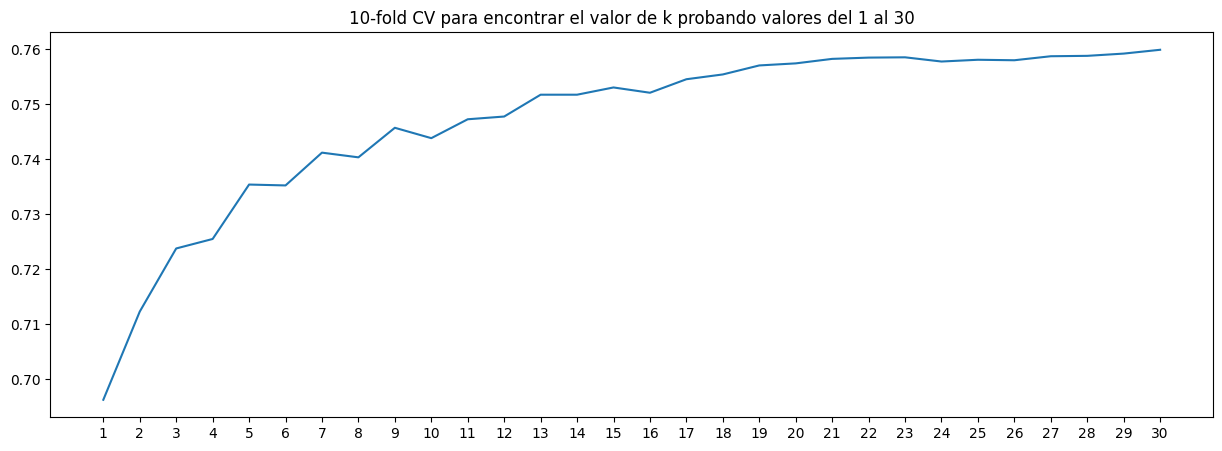

In [ ]:
maxk = 30
models = []
noms = [str(k) + 'NN classifier' for k in range(1, maxk + 1)]

for k in range(1, maxk + 1): models.append(neighbors.KNeighborsClassifier(n_neighbors = k))
resultats_val = []

for nom, model in zip(noms, models):

    scores_val = cross_val_score(model, X0_train_std, y0_train, cv = 10, scoring = 'accuracy')
    resultats_val.append(scores_val.mean())

    print(f"{nom}: {np.mean(scores_val):.3} (+/- {np.std(scores_val):.3})")

plt.figure(figsize=(15,5))
plt.plot(np.arange(1,31),resultats_val)
plt.title("10-fold CV para encontrar el valor de k probando valores del 1 al 30")
plt.xticks(np.arange(1,31));

In [ ]:
print("Número óptimo de vecinos: ", np.argmax(resultats_val)+1)

Número óptimo de vecinos:  30


Como podemos ver de la gráfica, el número de vecinos que genera una mejor accuracy es el de 30. Pero puesto que no queremos que se produzca overfiting y realmente esta siguiendo una especie de funcion logarítmica usaremos el 25.

Hacemos las predicciones con k = 25

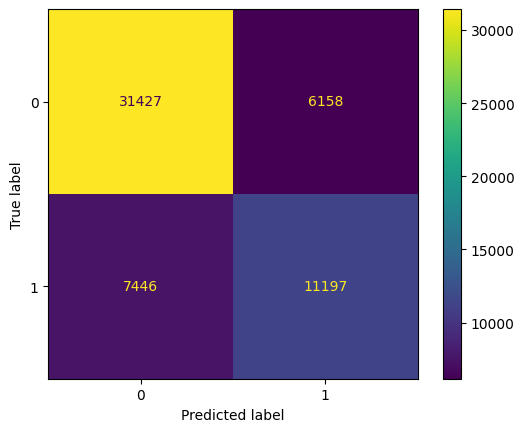

In [ ]:
knn25 = neighbors.KNeighborsClassifier(n_neighbors = 25) # construir el modelo
knn25.fit(X0_train_std, y0_train) # lo entrenamos con los datos de train
y0_pred = knn25.predict(X0_train_std) # hacemos las predicciones con esos mismos datos

# pasamos el modelo por la cross validation con la métrica de accuracy
ac_score = cross_val_score(knn25, X0_train_std, y0_train, cv = 10, scoring = 'accuracy')
y0_pred = cross_val_predict(knn25, X0_train_std, y0_train, cv = 10)

# hacemos y mostramos la confusion matrix
confusio = confusion_matrix(y0_train.values, y0_pred)
ConfusionMatrixDisplay(confusio).plot();

In [ ]:
print(classification_report(y0_train.values, y0_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     37585
           1       0.65      0.60      0.62     18643

    accuracy                           0.76     56228
   macro avg       0.73      0.72      0.72     56228
weighted avg       0.75      0.76      0.76     56228



Vemos la media de los scores generados por la cross validation y guardamos los resultados de este modelo.

In [ ]:
print(ac_score.mean())

0.7580565457227593


In [ ]:
# guardamos los resultados
nombres.append('KNN 0')
ac_scores.append(ac_score)

### De X1 e y1

Repetimos el proceso para los otros datos.

1NN classifier: 0.686 (+/- 0.00567)
2NN classifier: 0.706 (+/- 0.00525)
3NN classifier: 0.716 (+/- 0.00556)
4NN classifier: 0.723 (+/- 0.00422)
5NN classifier: 0.73 (+/- 0.00502)
6NN classifier: 0.73 (+/- 0.00609)
7NN classifier: 0.736 (+/- 0.00572)
8NN classifier: 0.736 (+/- 0.00504)
9NN classifier: 0.74 (+/- 0.00496)
10NN classifier: 0.74 (+/- 0.00583)
11NN classifier: 0.743 (+/- 0.00405)
12NN classifier: 0.742 (+/- 0.00437)
13NN classifier: 0.745 (+/- 0.00361)
14NN classifier: 0.744 (+/- 0.00488)
15NN classifier: 0.746 (+/- 0.00452)
16NN classifier: 0.747 (+/- 0.00342)
17NN classifier: 0.749 (+/- 0.00383)
18NN classifier: 0.749 (+/- 0.00379)
19NN classifier: 0.75 (+/- 0.00484)
20NN classifier: 0.75 (+/- 0.00496)
21NN classifier: 0.751 (+/- 0.00606)
22NN classifier: 0.749 (+/- 0.00506)
23NN classifier: 0.751 (+/- 0.00429)
24NN classifier: 0.75 (+/- 0.00454)
25NN classifier: 0.751 (+/- 0.00423)
26NN classifier: 0.75 (+/- 0.00424)
27NN classifier: 0.752 (+/- 0.00392)
28NN classifier: 0

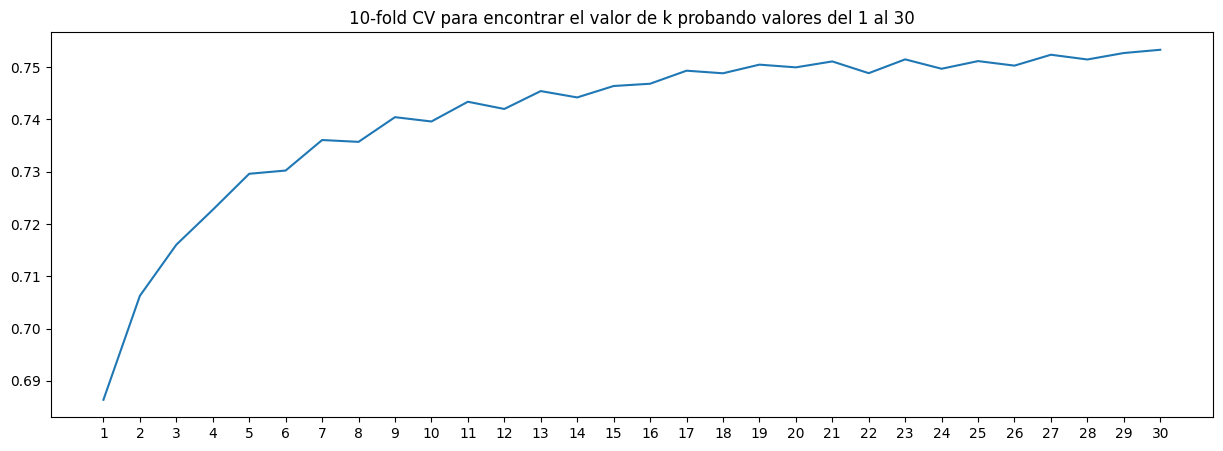

In [ ]:
maxk = 30
models = []
noms = [str(k) + 'NN classifier' for k in range(1, maxk + 1)]

for k in range(1, maxk + 1): models.append(neighbors.KNeighborsClassifier(n_neighbors = k))
resultats_val = []

for nom, model in zip(noms, models):

    scores_val = cross_val_score(model, X1_train_std, y1_train, cv = 10, scoring = 'accuracy')
    resultats_val.append(scores_val.mean())

    print(f"{nom}: {np.mean(scores_val):.3} (+/- {np.std(scores_val):.3})")

plt.figure(figsize=(15,5))
plt.plot(np.arange(1,31),resultats_val)
plt.title("10-fold CV para encontrar el valor de k probando valores del 1 al 30")
plt.xticks(np.arange(1,31));

In [ ]:
print("Número óptimo de vecinos: ", np.argmax(resultats_val)+1)

Número óptimo de vecinos:  30


Aunque salga que el mejor valor es el 30, como ya esta convergiendo nos quedaremos con el pico del valor 27, por la misma razón que con el otro modelo.

Predicciones con k = 27

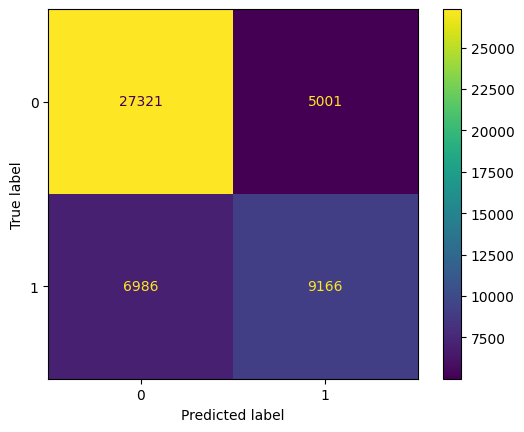

In [ ]:
knn27 = neighbors.KNeighborsClassifier(n_neighbors = 29) # construir el modelo
knn27.fit(X1_train_std, y1_train) # lo entrenamos con los datos de train
y1_pred = knn27.predict(X1_train_std) # hacemos las predicciones con esos mismos datos

# pasamos el modelo por la cross validation con la métrica de accuracy
ac_score = cross_val_score(knn27, X1_train_std, y1_train, cv = 10, scoring = 'accuracy')
y1_pred = cross_val_predict(knn27, X1_train_std, y1_train, cv = 10)

# hacemos y mostramos la confusion matrix
confusio = confusion_matrix(y1_train.values, y1_pred)
ConfusionMatrixDisplay(confusio).plot();

In [ ]:
print(classification_report(y1_train.values, y1_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82     32322
           1       0.65      0.57      0.60     16152

    accuracy                           0.75     48474
   macro avg       0.72      0.71      0.71     48474
weighted avg       0.75      0.75      0.75     48474



In [ ]:
print(ac_score.mean())

0.7527125119413117


In [ ]:
# guardamos los resultados
nombres.append('KNN 1')
ac_scores.append(ac_score)

## Support Vector Machine

Otro modelo que probaremos para la clasificación será el de SVM. Dado que probando el modelo los tiempos de ejecución son extremadamente elevados, puesto que el coste del SVM es cuadrático, para este modelo vamos a usar un sample de la muestra con menos datos.

In [ ]:
df_ori0 = df_ori.sample(20000)

X00 = df_ori0.drop(columns = ['Heart_Disease_Yes', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption'], axis = 1)
y00 = df_ori0['Heart_Disease_Yes']

X00_train, X00_test, y00_train, y00_test = train_test_split(X00, y00, test_size = 0.25, random_state = 0)

X00_train_std = scaler0.transform(X00_train)
X00_test_std = scaler0.transform(X00_test)

In [ ]:
X00.size

220000

### De X0 e y0

In [ ]:
np.logspace(-5, 2, 6)

array([1.00000000e-05, 2.51188643e-04, 6.30957344e-03, 1.58489319e-01,
       3.98107171e+00, 1.00000000e+02])

In [ ]:
np.logspace(-7, 4, 3)

array([1.00000000e-07, 3.16227766e-02, 1.00000000e+04])

In [ ]:
#Cs = np.logspace(-5, 2, 6)
#gammas = np.logspace(-7, 4, 3)

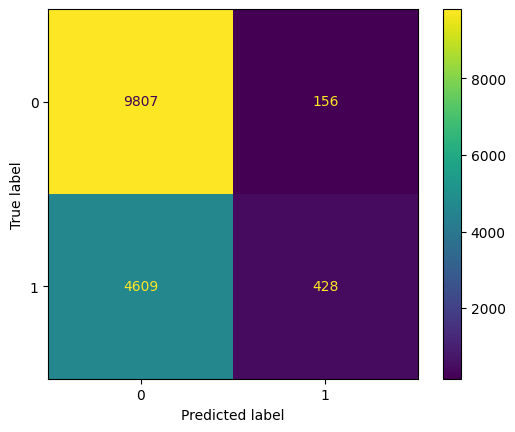

In [ ]:
SVC_ = SVC(kernel = 'poly', C = 0.01, degree = 2)
SVC_.fit(X00_train_std, y00_train)
y00_pred = SVC_.predict(X00_train_std)

ac_score = cross_val_score(SVC_, X00_train_std, y00_train, cv=5, scoring = 'accuracy')
y00_pred = cross_val_predict(SVC_, X00_train_std, y00_train, cv=5)

confusio = confusion_matrix(y00_train.values, y00_pred)
ConfusionMatrixDisplay(confusio).plot();

In [ ]:
print(classification_report(y00_train.values, y00_pred))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80      9963
           1       0.73      0.08      0.15      5037

    accuracy                           0.68     15000
   macro avg       0.71      0.53      0.48     15000
weighted avg       0.70      0.68      0.59     15000



In [ ]:
print(ac_score.mean())

0.6823333333333335


In [ ]:
#Cs = np.logspace(-5, 2, 4)
#gammas = np.logspace(-7, 4, 2)
#parametres = [{'kernel': ['rbf'], 'C': Cs, 'gamma': gammas}, {'kernel': ['poly'], 'C': Cs, 'degree': np.arange(2, 5)}]

#grid = GridSearchCV(SVC(),
#                    param_grid = parametres,
#                    cv = 5,
#                    scoring = 'accuracy',
#                    n_jobs=-1,
#                    verbose = 3)

#grid_search = grid.fit(X00_train_std, y00_train)
#grid_search.cv_results_

#print("Els millors hiperparàmetres són %s amb una accuracy mitjana de %0.2f"
#      % (grid.best_params_, grid.best_score_))

In [ ]:
#grid.cv_results_

Dado que los tiempos de training son demasiado elevados en comparación con los otros, y dificultan encontrar los mejores hiperparámetros para el modelo mediante el grid search decimos que realmente no valía la pena.

## Random forests

El último modelo que probaremos antes de compararlos todos serán los random forests.

### De X0 e y0

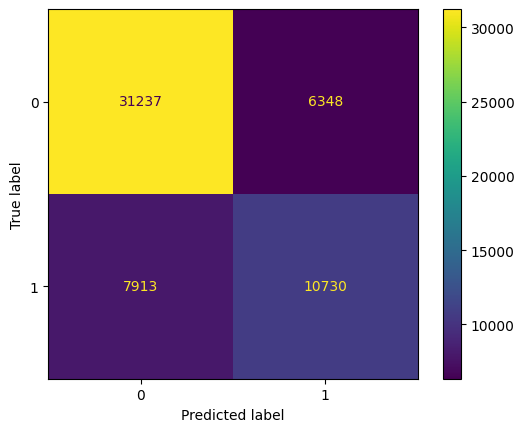

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X0_train_std, y0_train)
y0_pred = rfc.predict(X0_train_std)

ac_score = cross_val_score(rfc, X0_train_std, y0_train, cv=10, scoring = 'accuracy')
y0_pred = cross_val_predict(rfc, X0_train_std, y0_train, cv=10)

confusio = confusion_matrix(y0_train.values, y0_pred)
ConfusionMatrixDisplay(confusio).plot();

In [ ]:
print(classification_report(y0_train.values, y0_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     37585
           1       0.63      0.58      0.60     18643

    accuracy                           0.75     56228
   macro avg       0.71      0.70      0.71     56228
weighted avg       0.74      0.75      0.74     56228



In [ ]:
print(ac_score.mean())

0.7463719421674446


In [ ]:
# guardamos los resultados
nombres.append('Random Forest 0')
ac_scores.append(ac_score)

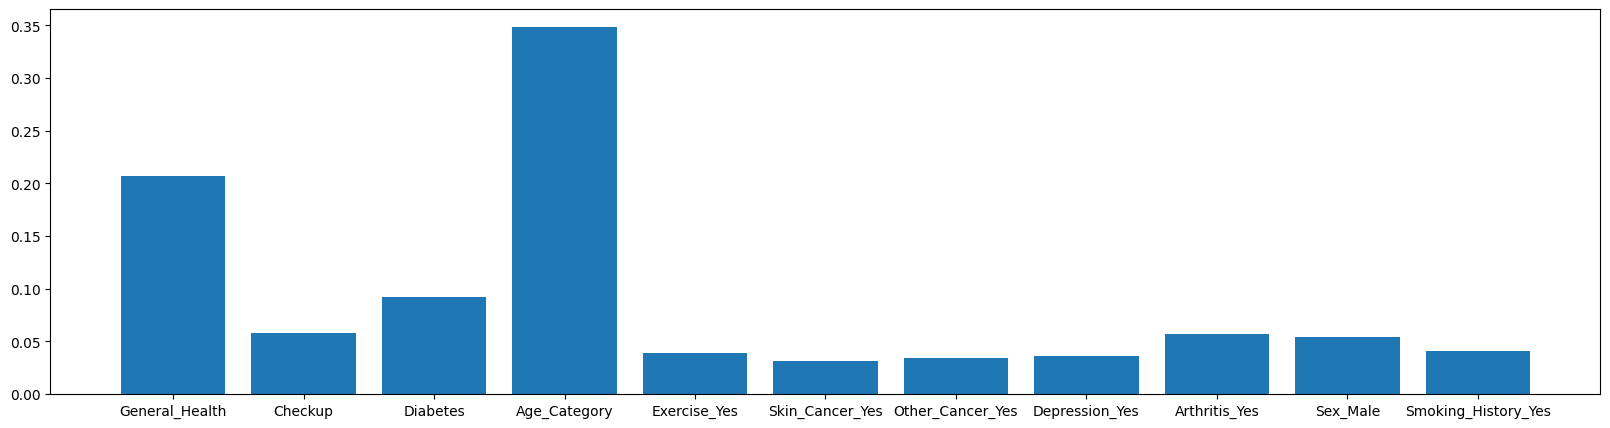

In [ ]:
importances = dict(zip(X0_train.columns, rfc.feature_importances_))
importances
plt.figure(figsize=(20, 5))
plt.bar(*zip(*importances.items()));

### De X1 e y1

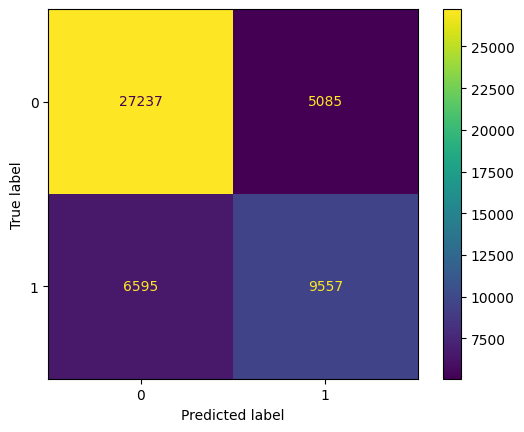

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X1_train_std, y1_train)
y1_pred = rfc.predict(X1_train_std)

ac_score = cross_val_score(rfc, X1_train_std, y1_train, cv=10, scoring = 'accuracy')
y1_pred = cross_val_predict(rfc, X1_train_std, y1_train, cv=10)
confusio = confusion_matrix(y1_train.values, y1_pred)
ConfusionMatrixDisplay(confusio).plot();

In [ ]:
print(classification_report(y1_train.values, y1_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     32322
           1       0.65      0.59      0.62     16152

    accuracy                           0.76     48474
   macro avg       0.73      0.72      0.72     48474
weighted avg       0.75      0.76      0.76     48474



In [ ]:
print(ac_score.mean())

0.7590457649282569


In [ ]:
# guardamos los resultados
nombres.append('Random Forest 1')
ac_scores.append(ac_score)

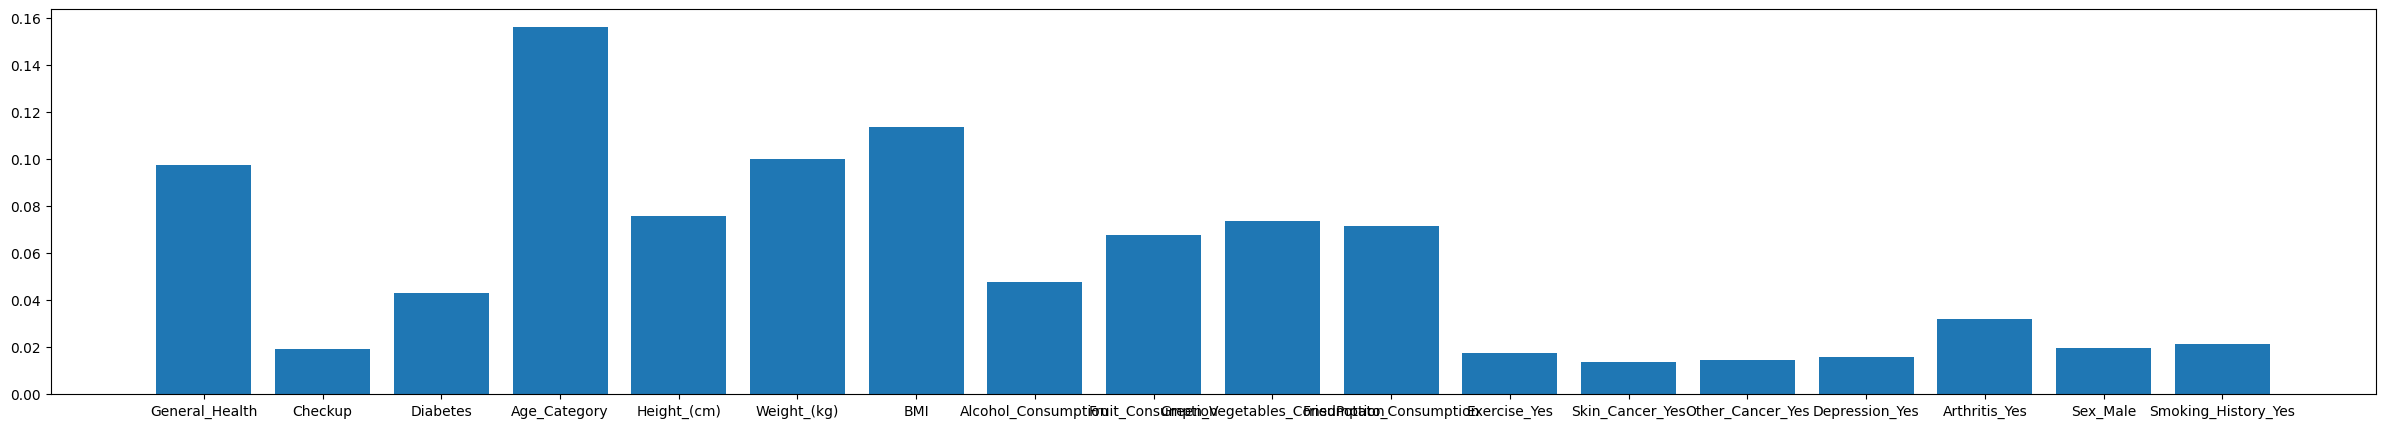

In [ ]:
importances = dict(zip(X1_train.columns, rfc.feature_importances_))
importances
plt.figure(figsize=(30, 5))
plt.bar(*zip(*importances.items()));

In [ ]:
X1_train.columns

Index(['General_Health', 'Checkup', 'Diabetes', 'Age_Category', 'Height_(cm)',
       'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'Exercise_Yes', 'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes',
       'Arthritis_Yes', 'Sex_Male', 'Smoking_History_Yes'],
      dtype='object')

Vemos que, aunque sean los estándares para el random forest, las variables que no estamos usando en X0 e y0 (desde Height hasta FriedPotato_Consumption) sí que que tienen bastante importancia en el resultado, bastante más de lo que parecía en las gráficas.

# Selección del modelo

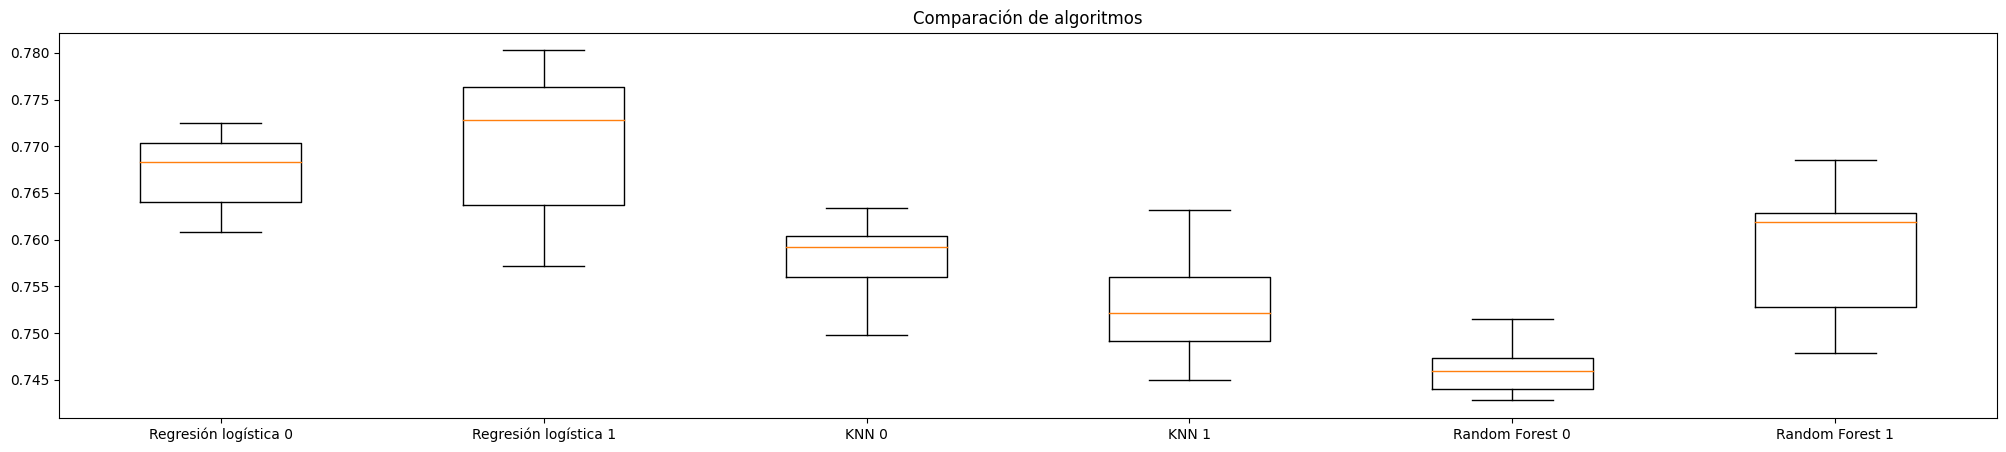

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (25,5))
ax.set_title('Comparación de algoritmos')
ax.boxplot(ac_scores)
ax.set_xticklabels(nombres)
#ax.set_ylim(0,1)
plt.show()
# la y es la accuracy
# funcionan mejor los más altos

Vemos que las dos regresiones logísticas son las que obtienen una mayor accuracy. Aunque la regresión logística 1, que es con la que no habíamos quitado columnas, llega a tener una mejor accuracy, es el modelo que más variabilidad tiene en los resultados.
Recuperamos las confussion matrix de ambos modelos para poder escoger uno definitivo.

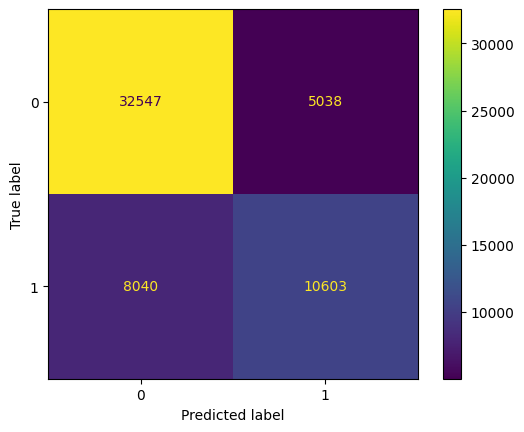

In [ ]:
logistic0 = LogisticRegression() # construir el modelo
logistic0.fit(X0_train_std, y0_train) # lo entrenamos con los datos de train
y0_pred = logistic0.predict(X0_train_std) # hacemos las predicciones con esos mismos datos

# pasamos el modelo por la cross validation con la métrica de accuracy
ac_score = cross_val_score(logistic0, X0_train_std, y0_train, cv = 10, scoring = 'accuracy')
y0_pred = cross_val_predict(logistic0, X0_train_std, y0_train, cv = 10)

# hacemos y mostramos la confusion matrix
confusio = confusion_matrix(y0_train.values, y0_pred)
ConfusionMatrixDisplay(confusio).plot();

In [ ]:
confusio[1,0]/y0_train.size

0.14298925802091483

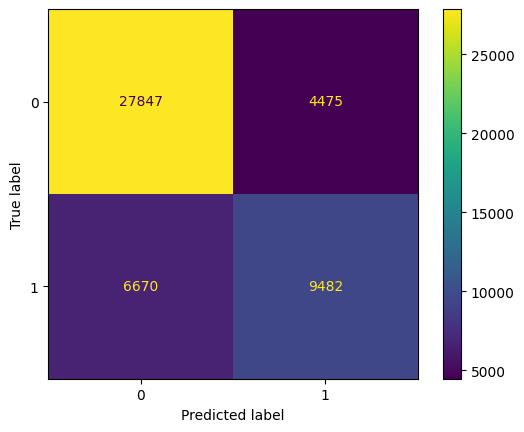

In [ ]:
logistic1 = LogisticRegression() # construir el modelo
logistic1.fit(X1_train_std, y1_train) # lo entrenamos con los datos de train
y1_pred = logistic1.predict(X1_train_std) # hacemos las predicciones con esos mismos datos

# pasamos el modelo por la cross validation con la métrica de accuracy
ac_score = cross_val_score(logistic1, X1_train_std, y1_train, cv = 10, scoring = 'accuracy')
y1_pred = cross_val_predict(logistic1, X1_train_std, y1_train, cv = 10)

# hacemos y mostramos la confusion matrix
confusio = confusion_matrix(y1_train.values, y1_pred)
ConfusionMatrixDisplay(confusio).plot();

In [ ]:
confusio[1,0]/y1_train.size

0.13759953789660437

Siendo una predicción de una enfermedad, creo que es mejor tener un menor número de false negatives, puesto que si una persona tiene la enfermedad y se le dice que no, y por lo tanto no se trata, se está poniendo mucho más en riesgo que si una persona que no lo tiene se empieza a tratar (a menos que el tratamiento sea excesivamente agresivo y pueda suponer un alto riesgo en sí mismo, pero como no lo sabemos nos basaremos en que no lo es).

Lo que sucede es que aunque a primera vista parezca que logistic1 tenga un menor numero de FN que logistic0, recordemos que hay un número diferente de datos entre ambos modelos, y cuando comparamos realmente los valores (no el número de la confussion matrix sino el de las casillas adyacentes a ellas) obtenemos que el modelo logistic0 da un mejor resultado en este sentido.


---

El modelo seleccionado es el logistic 0.

# Evaluación del modelo final

Una vez ya escogido el modelo solo queda utilizarlo con los datos de testing para obtener su métrica final.

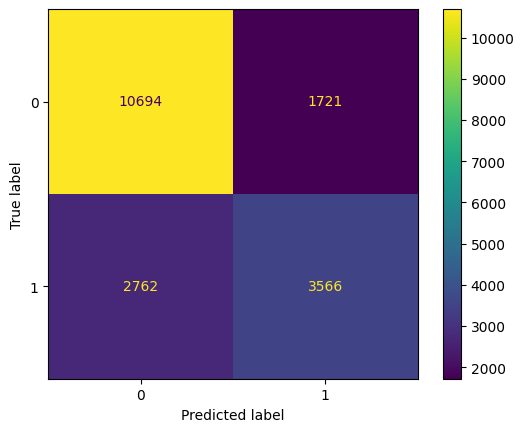

In [ ]:
y0_pred = logistic0.predict(X0_test_std) # hacemos las predicciones con esos mismos datos

# hacemos y mostramos la confusion matrix
confusio = confusion_matrix(y0_test.values, y0_pred)
ConfusionMatrixDisplay(confusio).plot();

In [ ]:
print(classification_report(y0_test.values, y0_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83     12415
           1       0.67      0.56      0.61      6328

    accuracy                           0.76     18743
   macro avg       0.73      0.71      0.72     18743
weighted avg       0.75      0.76      0.75     18743

